# Analysis of COVID-19 Data from The New York Times

*Author: Mark Bauer*  
*Date: March 28, 2020*

The New York Times Github Data [Repository](https://github.com/nytimes/covid-19-data).   
The New York Time [News Article](https://www.nytimes.com/article/coronavirus-county-data-us.html).  
The New York Times COVID-19 US Map: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.   
The New York Times COVID-19 Global Map: https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html.

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

covid_19_state_data = pd.read_csv(url)

In [4]:
covid_19_state_data.head(10)

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0
5  2020-01-25  California     6      1       0
6  2020-01-25    Illinois    17      1       0
7  2020-01-25  Washington    53      1       0
8  2020-01-26     Arizona     4      1       0
9  2020-01-26  California     6      2       0

In [5]:
table = covid_19_state_data.sort_values(by=['date', 'cases'], 
                                ascending=[False, False]).drop_duplicates(subset ="state", 
                                keep = 'first').reset_index(drop=True).head(10)

table['cases'] = table['cases'].map('{:,}'.format)
table['deaths'] = table['deaths'].map('{:,}'.format)
table.drop('fips', axis=1, inplace=True)
                 
print(table.to_markdown())

|    | date       | state         | cases   | deaths   |
|---:|:-----------|:--------------|:--------|:---------|
|  0 | 2020-04-14 | New York      | 202,208 | 10,834   |
|  1 | 2020-04-14 | New Jersey    | 68,824  | 2,805    |
|  2 | 2020-04-14 | Massachusetts | 28,163  | 957      |
|  3 | 2020-04-14 | Michigan      | 26,844  | 1,766    |
|  4 | 2020-04-14 | California    | 25,758  | 778      |
|  5 | 2020-04-14 | Pennsylvania  | 25,591  | 746      |
|  6 | 2020-04-14 | Illinois      | 23,247  | 878      |
|  7 | 2020-04-14 | Florida       | 21,620  | 570      |
|  8 | 2020-04-14 | Louisiana     | 21,518  | 1,013    |
|  9 | 2020-04-14 | Texas         | 15,304  | 365      |


In [6]:
covid_19_state_data.shape

(2385, 5)

In [7]:
print('New York Times COVID-19 data as of', covid_19_state_data.sort_values(by='date', 
                                   ascending=False)['date'].iloc[0])

New York Times COVID-19 data as of 2020-04-14


In [8]:
current_date = covid_19_state_data.sort_values(by='date', ascending=False)['date'].iloc[0]

In [9]:
print('The current date of this notebook is', current_date)

The current date of this notebook is 2020-04-14


In [10]:
covid_19_state_data.date = pd.to_datetime(covid_19_state_data.date, infer_datetime_format=True)

In [11]:
covid_19_state_data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

In [12]:
drop_duplicates = covid_19_state_data.sort_values(by="cases", ascending=False).drop_duplicates(
                                                    subset ="state", keep = 'first')
top_10 = drop_duplicates[0:10]
top10_list = list(top_10.state)
top_10  = covid_19_state_data.loc[covid_19_state_data['state'].isin(top10_list)]

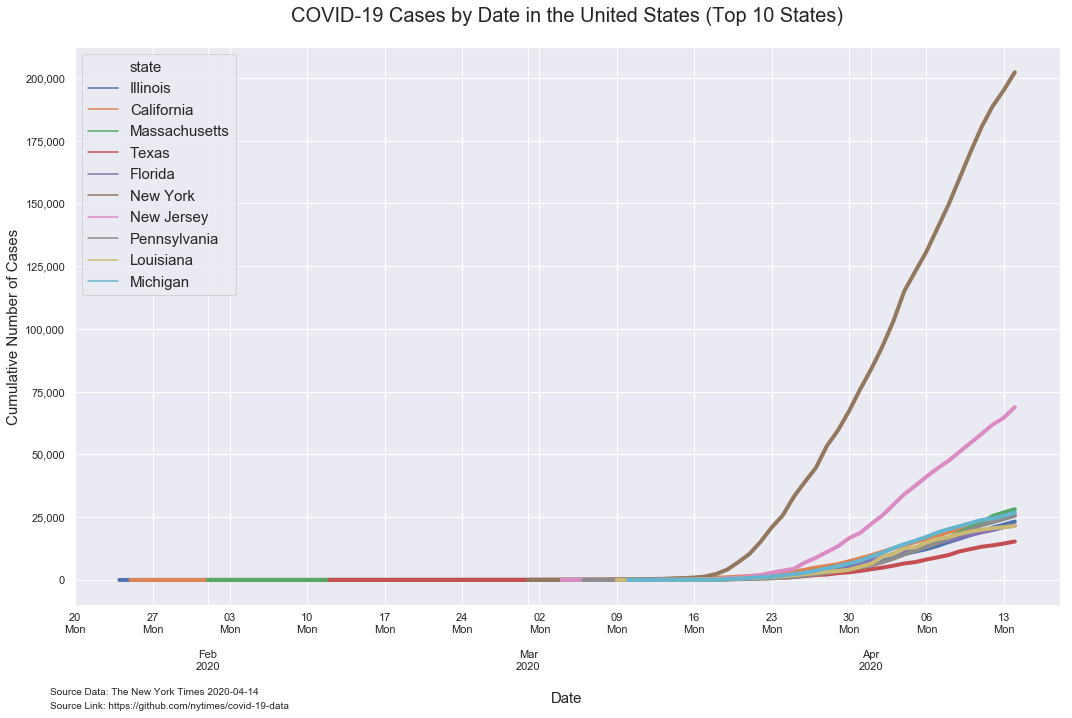

In [13]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('COVID-19 Cases by Date in the United States (Top 10 States)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries')

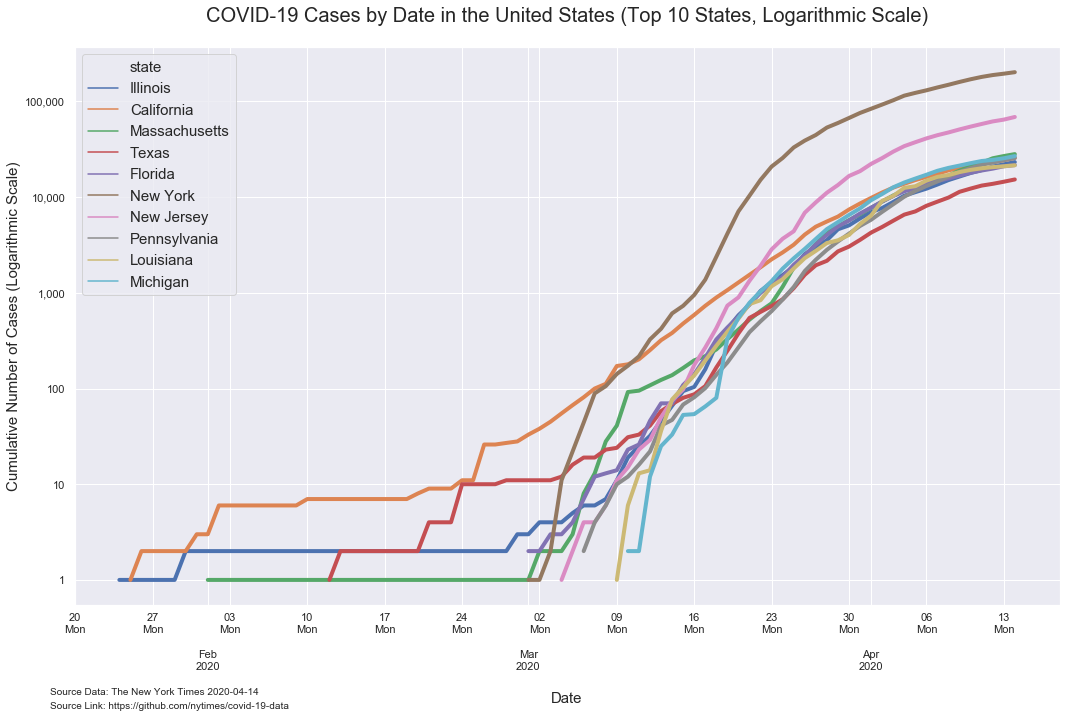

In [14]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases (Logarithmic Scale)', fontsize=15)
plt.title('COVID-19 Cases by Date in the United States (Top 10 States, Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-log')

# Date to 10 Cases

In [15]:
state_ten_cases = top_10.loc[top_10.cases >= 10]

In [16]:
state_ten_cases = state_ten_cases.sort_values(by=['date', 'cases'], 
                                              ascending=[True, True]).drop_duplicates(subset ="state", 
                                                                                      keep = 'first').reset_index(drop=True)

In [17]:
state_ten_cases = state_ten_cases[['date', 'state']]
state_ten_cases.rename(columns={'date': 'date_ten_case'}, inplace=True)

In [18]:
state_ten_cases

date_ten_case          state
0    2020-02-24          Texas
1    2020-02-24     California
2    2020-03-04       New York
3    2020-03-07        Florida
4    2020-03-07  Massachusetts
5    2020-03-09   Pennsylvania
6    2020-03-09       Illinois
7    2020-03-09     New Jersey
8    2020-03-11      Louisiana
9    2020-03-12       Michigan

In [19]:
state_ten_cases = top_10.merge(state_ten_cases, left_on='state', right_on='state')

In [20]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case
0   2020-01-24  Illinois    17      1       0    2020-03-09
1   2020-01-25  Illinois    17      1       0    2020-03-09
2   2020-01-26  Illinois    17      1       0    2020-03-09
3   2020-01-27  Illinois    17      1       0    2020-03-09
4   2020-01-28  Illinois    17      1       0    2020-03-09
..         ...       ...   ...    ...     ...           ...
540 2020-04-10  Michigan    26  22646    1280    2020-03-12
541 2020-04-11  Michigan    26  23853    1391    2020-03-12
542 2020-04-12  Michigan    26  24494    1486    2020-03-12
543 2020-04-13  Michigan    26  25487    1601    2020-03-12
544 2020-04-14  Michigan    26  26844    1766    2020-03-12

[545 rows x 6 columns]

In [21]:
state_ten_cases = state_ten_cases.loc[state_ten_cases.cases >= 10]

In [22]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case
45  2020-03-09  Illinois    17     11       0    2020-03-09
46  2020-03-10  Illinois    17     19       0    2020-03-09
47  2020-03-11  Illinois    17     25       0    2020-03-09
48  2020-03-12  Illinois    17     32       0    2020-03-09
49  2020-03-13  Illinois    17     46       0    2020-03-09
..         ...       ...   ...    ...     ...           ...
540 2020-04-10  Michigan    26  22646    1280    2020-03-12
541 2020-04-11  Michigan    26  23853    1391    2020-03-12
542 2020-04-12  Michigan    26  24494    1486    2020-03-12
543 2020-04-13  Michigan    26  25487    1601    2020-03-12
544 2020-04-14  Michigan    26  26844    1766    2020-03-12

[402 rows x 6 columns]

In [23]:
state_ten_cases['days_since_ten_case'] = (state_ten_cases['date'] - 
                                      state_ten_cases['date_ten_case']).dt.days

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
state_ten_cases

date     state  fips  cases  deaths date_ten_case  \
45  2020-03-09  Illinois    17     11       0    2020-03-09   
46  2020-03-10  Illinois    17     19       0    2020-03-09   
47  2020-03-11  Illinois    17     25       0    2020-03-09   
48  2020-03-12  Illinois    17     32       0    2020-03-09   
49  2020-03-13  Illinois    17     46       0    2020-03-09   
..         ...       ...   ...    ...     ...           ...   
540 2020-04-10  Michigan    26  22646    1280    2020-03-12   
541 2020-04-11  Michigan    26  23853    1391    2020-03-12   
542 2020-04-12  Michigan    26  24494    1486    2020-03-12   
543 2020-04-13  Michigan    26  25487    1601    2020-03-12   
544 2020-04-14  Michigan    26  26844    1766    2020-03-12   

     days_since_ten_case  
45                     0  
46                     1  
47                     2  
48                     3  
49                     4  
..                   ...  
540                   29  
541                   30  
542                   31  
543                   32  
544                   33  

[402 rows x 7 columns]

# Daily Number of Cases Since 10th Case

In [25]:
state_ten_cases['daily_cases'] = (state_ten_cases.cases -
                                state_ten_cases.cases.shift(1))

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
state_ten_cases[:50]

date       state  fips  cases  deaths date_ten_case  \
45  2020-03-09    Illinois    17     11       0    2020-03-09   
46  2020-03-10    Illinois    17     19       0    2020-03-09   
47  2020-03-11    Illinois    17     25       0    2020-03-09   
48  2020-03-12    Illinois    17     32       0    2020-03-09   
49  2020-03-13    Illinois    17     46       0    2020-03-09   
50  2020-03-14    Illinois    17     66       0    2020-03-09   
51  2020-03-15    Illinois    17     94       0    2020-03-09   
52  2020-03-16    Illinois    17    104       0    2020-03-09   
53  2020-03-17    Illinois    17    159       1    2020-03-09   
54  2020-03-18    Illinois    17    286       1    2020-03-09   
55  2020-03-19    Illinois    17    420       4    2020-03-09   
56  2020-03-20    Illinois    17    583       5    2020-03-09   
57  2020-03-21    Illinois    17    751       6    2020-03-09   
58  2020-03-22    Illinois    17   1047       9    2020-03-09   
59  2020-03-23    Illinois    17   1285      12    2020-03-09   
60  2020-03-24    Illinois    17   1535      16    2020-03-09   
61  2020-03-25    Illinois    17   1875      21    2020-03-09   
62  2020-03-26    Illinois    17   2538      26    2020-03-09   
63  2020-03-27    Illinois    17   3029      37    2020-03-09   
64  2020-03-28    Illinois    17   3547      50    2020-03-09   
65  2020-03-29    Illinois    17   4613      70    2020-03-09   
66  2020-03-30    Illinois    17   5070      84    2020-03-09   
67  2020-03-31    Illinois    17   5994     107    2020-03-09   
68  2020-04-01    Illinois    17   6980     146    2020-03-09   
69  2020-04-02    Illinois    17   7695     165    2020-03-09   
70  2020-04-03    Illinois    17   8904     211    2020-03-09   
71  2020-04-04    Illinois    17  10357     248    2020-03-09   
72  2020-04-05    Illinois    17  11276     282    2020-03-09   
73  2020-04-06    Illinois    17  12262     309    2020-03-09   
74  2020-04-07    Illinois    17  13549     384    2020-03-09   
75  2020-04-08    Illinois    17  15078     464    2020-03-09   
76  2020-04-09    Illinois    17  16422     534    2020-03-09   
77  2020-04-10    Illinois    17  17887     607    2020-03-09   
78  2020-04-11    Illinois    17  19180     682    2020-03-09   
79  2020-04-12    Illinois    17  20852     727    2020-03-09   
80  2020-04-13    Illinois    17  22025     800    2020-03-09   
81  2020-04-14    Illinois    17  23247     878    2020-03-09   
112 2020-02-24  California     6     11       0    2020-02-24   
113 2020-02-25  California     6     11       0    2020-02-24   
114 2020-02-26  California     6     26       0    2020-02-24   
115 2020-02-27  California     6     26       0    2020-02-24   
116 2020-02-28  California     6     27       0    2020-02-24   
117 2020-02-29  California     6     28       0    2020-02-24   
118 2020-03-01  California     6     33       0    2020-02-24   
119 2020-03-02  California     6     38       0    2020-02-24   
120 2020-03-03  California     6     45       0    2020-02-24   
121 2020-03-04  California     6     55       1    2020-02-24   
122 2020-03-05  California     6     67       1    2020-02-24   
123 2020-03-06  California     6     81       1    2020-02-24   
124 2020-03-07  California     6    100       1    2020-02-24   

     days_since_ten_case  daily_cases  
45                     0          NaN  
46                     1          8.0  
47                     2          6.0  
48                     3          7.0  
49                     4         14.0  
50                     5         20.0  
51                     6         28.0  
52                     7         10.0  
53                     8         55.0  
54                     9        127.0  
55                    10        134.0  
56                    11        163.0  
57                    12        168.0  
58                    13        296.0  
59                    14        238.0  
60                    15        250.0  
61            

In [27]:
state_ten_cases.columns

Index(['date', 'state', 'fips', 'cases', 'deaths', 'date_ten_case',
       'days_since_ten_case', 'daily_cases'],
      dtype='object')

In [28]:
state_ten_cases = state_ten_cases[['date', 'state', 'cases',  
                                   'daily_cases', 'deaths', 'date_ten_case','days_since_ten_case']]

In [29]:
state_ten_cases[250:300]

date         state   cases  daily_cases  deaths date_ten_case  \
381 2020-04-06      New York  130703       7792.0    4758    2020-03-04   
382 2020-04-07      New York  140081       9378.0    5563    2020-03-04   
383 2020-04-08      New York  149401       9320.0    6268    2020-03-04   
384 2020-04-09      New York  159937      10536.0    7067    2020-03-04   
385 2020-04-10      New York  170512      10575.0    7844    2020-03-04   
386 2020-04-11      New York  180458       9946.0    8627    2020-03-04   
387 2020-04-12      New York  188694       8236.0    9385    2020-03-04   
388 2020-04-13      New York  195031       6337.0   10056    2020-03-04   
389 2020-04-14      New York  202208       7177.0   10834    2020-03-04   
395 2020-03-09    New Jersey      11    -202197.0       0    2020-03-09   
396 2020-03-10    New Jersey      15          4.0       1    2020-03-09   
397 2020-03-11    New Jersey      23          8.0       1    2020-03-09   
398 2020-03-12    New Jersey      29          6.0       1    2020-03-09   
399 2020-03-13    New Jersey      50         21.0       1    2020-03-09   
400 2020-03-14    New Jersey      75         25.0       2    2020-03-09   
401 2020-03-15    New Jersey      98         23.0       2    2020-03-09   
402 2020-03-16    New Jersey     176         78.0       3    2020-03-09   
403 2020-03-17    New Jersey     268         92.0       3    2020-03-09   
404 2020-03-18    New Jersey     427        159.0       5    2020-03-09   
405 2020-03-19    New Jersey     735        308.0       9    2020-03-09   
406 2020-03-20    New Jersey     896        161.0      11    2020-03-09   
407 2020-03-21    New Jersey    1336        440.0      16    2020-03-09   
408 2020-03-22    New Jersey    1914        578.0      20    2020-03-09   
409 2020-03-23    New Jersey    2844        930.0      27    2020-03-09   
410 2020-03-24    New Jersey    3675        831.0      44    2020-03-09   
411 2020-03-25    New Jersey    4402        727.0      62    2020-03-09   
412 2020-03-26    New Jersey    6876       2474.0      81    2020-03-09   
413 2020-03-27    New Jersey    8825       1949.0     108    2020-03-09   
414 2020-03-28    New Jersey   11124       2299.0     140    2020-03-09   
415 2020-03-29    New Jersey   13386       2262.0     161    2020-03-09   
416 2020-03-30    New Jersey   16636       3250.0     199    2020-03-09   
417 2020-03-31    New Jersey   18696       2060.0     267    2020-03-09   
418 2020-04-01    New Jersey   22255       3559.0     355    2020-03-09   
419 2020-04-02    New Jersey   25590       3335.0     539    2020-03-09   
420 2020-04-03    New Jersey   29895       4305.0     647    2020-03-09   
421 2020-04-04    New Jersey   34124       4229.0     847    2020-03-09   
422 2020-04-05    New Jersey   37505       3381.0     917    2020-03-09   
423 2020-04-06    New Jersey   41090       3585.0    1005    2020-03-09   
424 2020-04-07    New Jersey   44416       3326.0    1232    2020-03-09   
425 2020-04-08    New Jersey   47437       3021.0    1504    2020-03-09   
426 2020-04-09    New Jersey   51027       3590.0    1700    2020-03-09   
427 2020-04-10    New Jersey   54588       3561.0    1932    2020-03-09   
428 2020-04-11    New Jersey   58151       3563.0    2183    2020-03-09   
429 2020-04-12    New Jersey   61850       3699.0    2350    2020-03-09   
430 2020-04-13    New Jersey   64584       2734.0    2443    2020-03-09   
431 2020-04-14    New Jersey   68824       4240.0    2805    2020-03-09   
435 2020-03-09  Pennsylvania      10     -68814.0       0    2020-03-09   
436 2020-03-10  Pennsylvania      12          2.0       0    2020-03-09   
437 2020-03-11  Pennsylvania      16          4.0       0    2020-03-09   
438 2020-03-12  Pennsylvania      22          6.0       0    2020-03-09   

     days_since_ten_case  
381                   33  
382                   34  
383                   35  
384                   36  
385                   37  
386                   

In [30]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases < 0] = state_ten_cases['cases'] - 10

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases.isnull()] = state_ten_cases['cases'] - 10

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
state_ten_cases[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
45  2020-03-09    Illinois     11          1.0       0    2020-03-09   
46  2020-03-10    Illinois     19          8.0       0    2020-03-09   
47  2020-03-11    Illinois     25          6.0       0    2020-03-09   
48  2020-03-12    Illinois     32          7.0       0    2020-03-09   
49  2020-03-13    Illinois     46         14.0       0    2020-03-09   
50  2020-03-14    Illinois     66         20.0       0    2020-03-09   
51  2020-03-15    Illinois     94         28.0       0    2020-03-09   
52  2020-03-16    Illinois    104         10.0       0    2020-03-09   
53  2020-03-17    Illinois    159         55.0       1    2020-03-09   
54  2020-03-18    Illinois    286        127.0       1    2020-03-09   
55  2020-03-19    Illinois    420        134.0       4    2020-03-09   
56  2020-03-20    Illinois    583        163.0       5    2020-03-09   
57  2020-03-21    Illinois    751        168.0       6    2020-03-09   
58  2020-03-22    Illinois   1047        296.0       9    2020-03-09   
59  2020-03-23    Illinois   1285        238.0      12    2020-03-09   
60  2020-03-24    Illinois   1535        250.0      16    2020-03-09   
61  2020-03-25    Illinois   1875        340.0      21    2020-03-09   
62  2020-03-26    Illinois   2538        663.0      26    2020-03-09   
63  2020-03-27    Illinois   3029        491.0      37    2020-03-09   
64  2020-03-28    Illinois   3547        518.0      50    2020-03-09   
65  2020-03-29    Illinois   4613       1066.0      70    2020-03-09   
66  2020-03-30    Illinois   5070        457.0      84    2020-03-09   
67  2020-03-31    Illinois   5994        924.0     107    2020-03-09   
68  2020-04-01    Illinois   6980        986.0     146    2020-03-09   
69  2020-04-02    Illinois   7695        715.0     165    2020-03-09   
70  2020-04-03    Illinois   8904       1209.0     211    2020-03-09   
71  2020-04-04    Illinois  10357       1453.0     248    2020-03-09   
72  2020-04-05    Illinois  11276        919.0     282    2020-03-09   
73  2020-04-06    Illinois  12262        986.0     309    2020-03-09   
74  2020-04-07    Illinois  13549       1287.0     384    2020-03-09   
75  2020-04-08    Illinois  15078       1529.0     464    2020-03-09   
76  2020-04-09    Illinois  16422       1344.0     534    2020-03-09   
77  2020-04-10    Illinois  17887       1465.0     607    2020-03-09   
78  2020-04-11    Illinois  19180       1293.0     682    2020-03-09   
79  2020-04-12    Illinois  20852       1672.0     727    2020-03-09   
80  2020-04-13    Illinois  22025       1173.0     800    2020-03-09   
81  2020-04-14    Illinois  23247       1222.0     878    2020-03-09   
112 2020-02-24  California     11          1.0       0    2020-02-24   
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
117 2020-02-29  California     28          1.0       0    2020-02-24   
118 2020-03-01  California     33          5.0       0    2020-02-24   
119 2020-03-02  California     38          5.0       0    2020-02-24   
120 2020-03-03  California     45          7.0       0    2020-02-24   
121 2020-03-04  California     55         10.0       1    2020-02-24   
122 2020-03-05  California     67         12.0       1    2020-02-24   
123 2020-03-06  California     81         14.0       1    2020-02-24   
124 2020-03-07  California    100         19.0       1    2020-02-24   

     days_since_ten_case  
45                     0  
46                     1  
47                     2  
48                     3  
49                     4  
50                     5  
51                     6  
52                     7  
53                     8  
54                     9  
55                    10  
56           

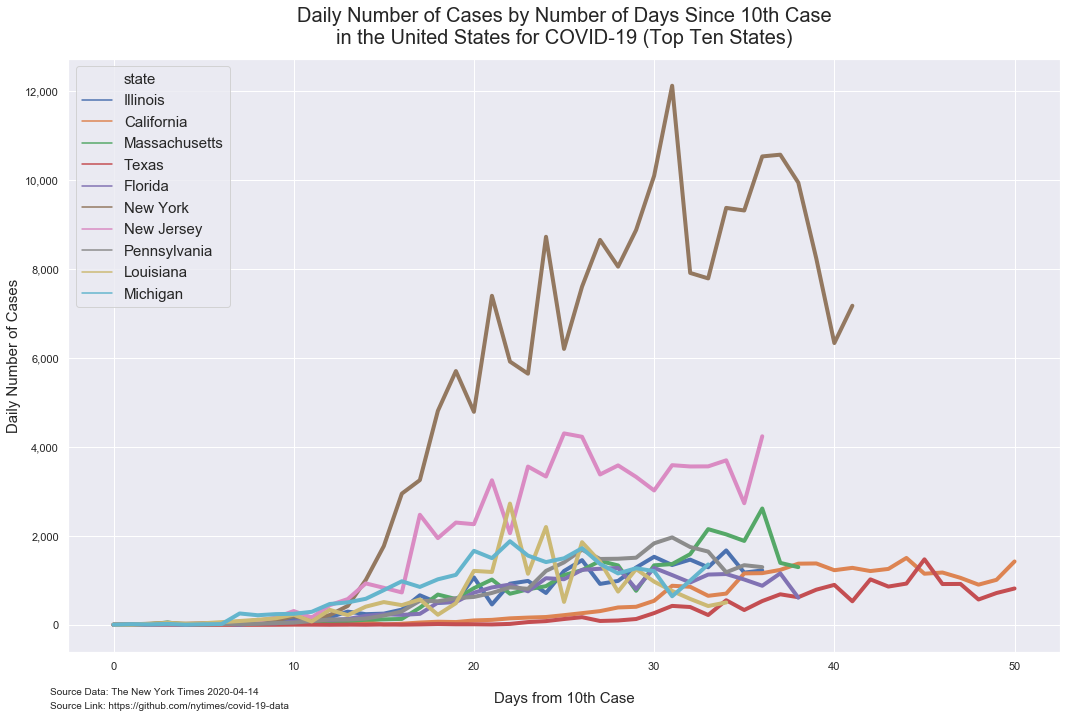

In [33]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="daily_cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-daily')

In [34]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases == 0]

113    0.0
115    0.0
249    0.0
250    0.0
251    0.0
252    0.0
254    0.0
255    0.0
256    0.0
257    0.0
261    0.0
313    0.0
435    0.0
Name: daily_cases, dtype: float64

In [35]:
temp_fill_zeros = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                                 ascending=[True, True, True])

temp_fill_zeros['daily_cases'].loc[state_ten_cases.daily_cases == 0] = 1

temp_fill_zeros

date       state  cases  daily_cases  deaths date_ten_case  \
112 2020-02-24  California     11          1.0       0    2020-02-24   
113 2020-02-25  California     11          1.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          1.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
..         ...         ...    ...          ...     ...           ...   
295 2020-04-10       Texas  12288        916.0     247    2020-02-24   
296 2020-04-11       Texas  13206        918.0     266    2020-02-24   
297 2020-04-12       Texas  13774        568.0     289    2020-02-24   
298 2020-04-13       Texas  14488        714.0     320    2020-02-24   
299 2020-04-14       Texas  15304        816.0     365    2020-02-24   

     days_since_ten_case  
112                    0  
113                    1  
114                    2  
115                    3  
116                    4  
..                   ...  
295                   46  
296                   47  
297                   48  
298                   49  
299                   50  

[402 rows x 7 columns]

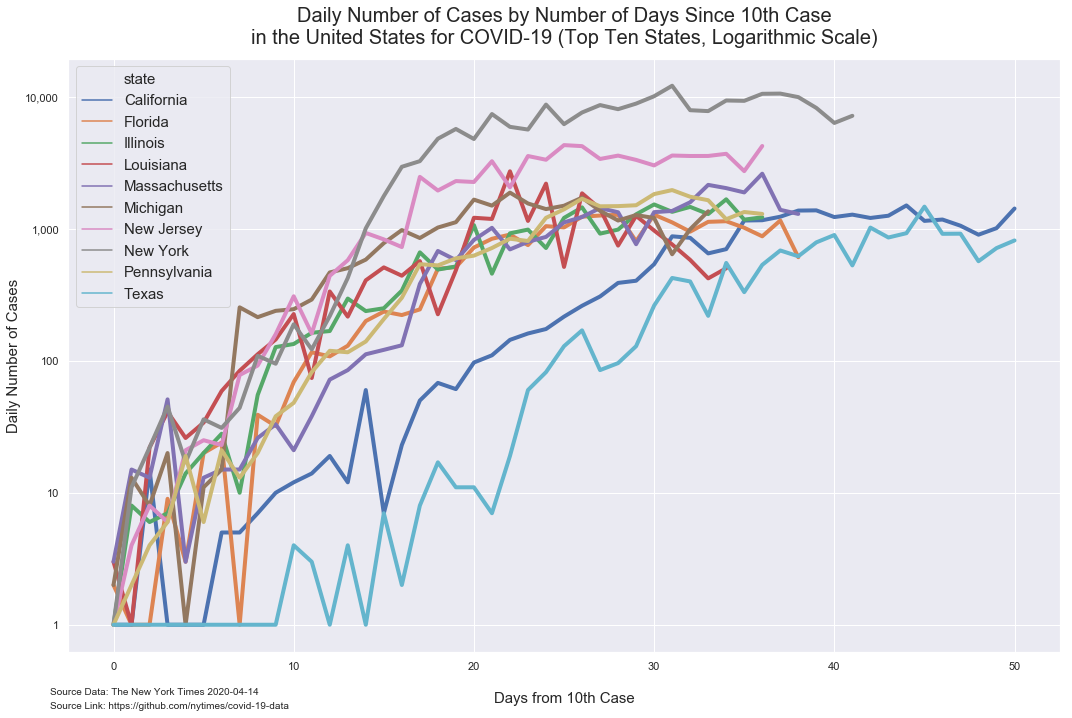

In [36]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="days_since_ten_case", y="daily_cases",
             hue="state",
             data=temp_fill_zeros, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-daily-log')

In [37]:
state_ten_cases['daily_cases'].loc[state_ten_cases.daily_cases == 0]

113    0.0
115    0.0
249    0.0
250    0.0
251    0.0
252    0.0
254    0.0
255    0.0
256    0.0
257    0.0
261    0.0
313    0.0
435    0.0
Name: daily_cases, dtype: float64

# Daily Number of Cases Since 10th Case (Weekly Average)

In [38]:
state_ten_cases_weekly = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                                    ascending=[True, True, True])

In [39]:
state_ten_cases_weekly[0:30]

date       state  cases  daily_cases  deaths date_ten_case  \
112 2020-02-24  California     11          1.0       0    2020-02-24   
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
117 2020-02-29  California     28          1.0       0    2020-02-24   
118 2020-03-01  California     33          5.0       0    2020-02-24   
119 2020-03-02  California     38          5.0       0    2020-02-24   
120 2020-03-03  California     45          7.0       0    2020-02-24   
121 2020-03-04  California     55         10.0       1    2020-02-24   
122 2020-03-05  California     67         12.0       1    2020-02-24   
123 2020-03-06  California     81         14.0       1    2020-02-24   
124 2020-03-07  California    100         19.0       1    2020-02-24   
125 2020-03-08  California    112         12.0       1    2020-02-24   
126 2020-03-09  California    172         60.0       2    2020-02-24   
127 2020-03-10  California    179          7.0       3    2020-02-24   
128 2020-03-11  California    202         23.0       4    2020-02-24   
129 2020-03-12  California    252         50.0       4    2020-02-24   
130 2020-03-13  California    320         68.0       5    2020-02-24   
131 2020-03-14  California    381         61.0       5    2020-02-24   
132 2020-03-15  California    478         97.0       6    2020-02-24   
133 2020-03-16  California    588        110.0      11    2020-02-24   
134 2020-03-17  California    732        144.0      14    2020-02-24   
135 2020-03-18  California    893        161.0      17    2020-02-24   
136 2020-03-19  California   1067        174.0      19    2020-02-24   
137 2020-03-20  California   1283        216.0      24    2020-02-24   
138 2020-03-21  California   1544        261.0      28    2020-02-24   
139 2020-03-22  California   1851        307.0      35    2020-02-24   
140 2020-03-23  California   2240        389.0      39    2020-02-24   
141 2020-03-24  California   2644        404.0      52    2020-02-24   

     days_since_ten_case  
112                    0  
113                    1  
114                    2  
115                    3  
116                    4  
117                    5  
118                    6  
119                    7  
120                    8  
121                    9  
122                   10  
123                   11  
124                   12  
125                   13  
126                   14  
127                   15  
128                   16  
129                   17  
130                   18  
131                   19  
132                   20  
133                   21  
134                   22  
135                   23  
136                   24  
137                   25  
138                   26  
139                   27  
140                   28  
141                   29

In [40]:
state_ten_cases_weekly = state_ten_cases_weekly.set_index('date').groupby('state').resample('W').agg({'days_since_ten_case': 
                                                                    np.max, 'daily_cases': np.mean})

In [41]:
state_ten_cases_weekly

days_since_ten_case  daily_cases
state      date                                        
California 2020-03-01                    6     3.285714
           2020-03-08                   13    11.285714
           2020-03-15                   20    52.285714
           2020-03-22                   27   196.142857
           2020-03-29                   34   630.714286
...                                    ...          ...
Texas      2020-03-22                   27    78.857143
           2020-03-29                   34   297.142857
           2020-04-05                   41   626.000000
           2020-04-12                   48   954.285714
           2020-04-19                   50   765.000000

[67 rows x 2 columns]

In [42]:
state_ten_cases_weekly.reset_index(inplace=True)
state_ten_cases_weekly.rename(columns={'daily_cases': 'daily_cases_week_average'}, inplace=True)

In [43]:
state_ten_cases_weekly

state       date  days_since_ten_case  daily_cases_week_average
0   California 2020-03-01                    6                  3.285714
1   California 2020-03-08                   13                 11.285714
2   California 2020-03-15                   20                 52.285714
3   California 2020-03-22                   27                196.142857
4   California 2020-03-29                   34                630.714286
..         ...        ...                  ...                       ...
62       Texas 2020-03-22                   27                 78.857143
63       Texas 2020-03-29                   34                297.142857
64       Texas 2020-04-05                   41                626.000000
65       Texas 2020-04-12                   48                954.285714
66       Texas 2020-04-19                   50                765.000000

[67 rows x 4 columns]

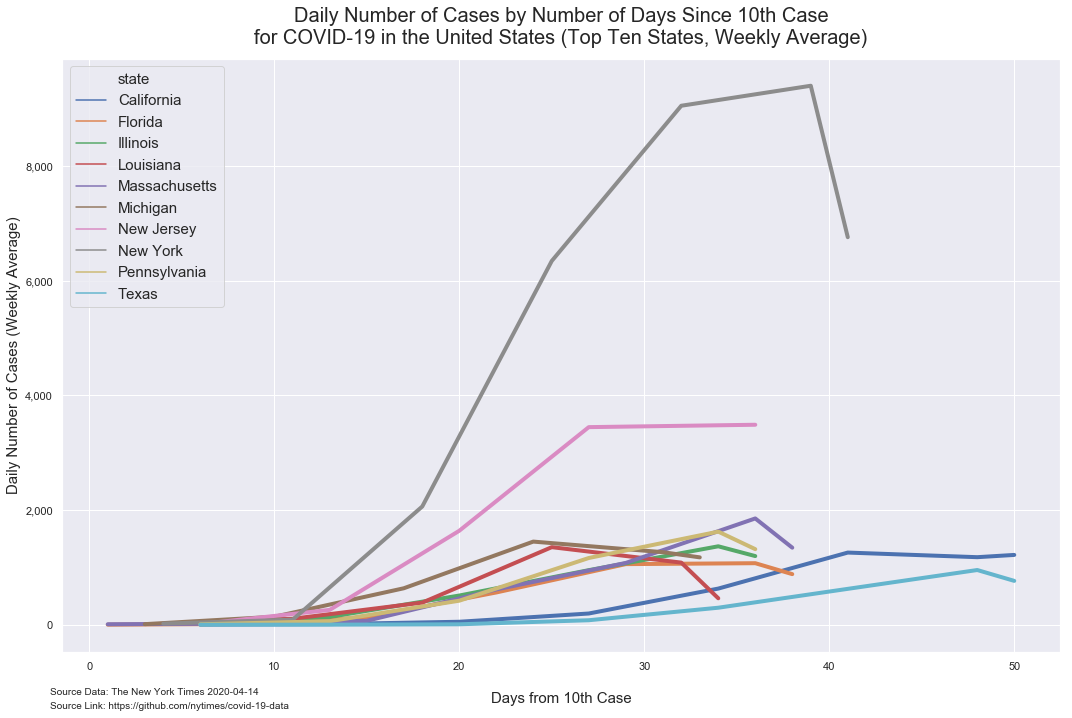

In [44]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
sns.lineplot(x="days_since_ten_case", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 in the United States (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly')

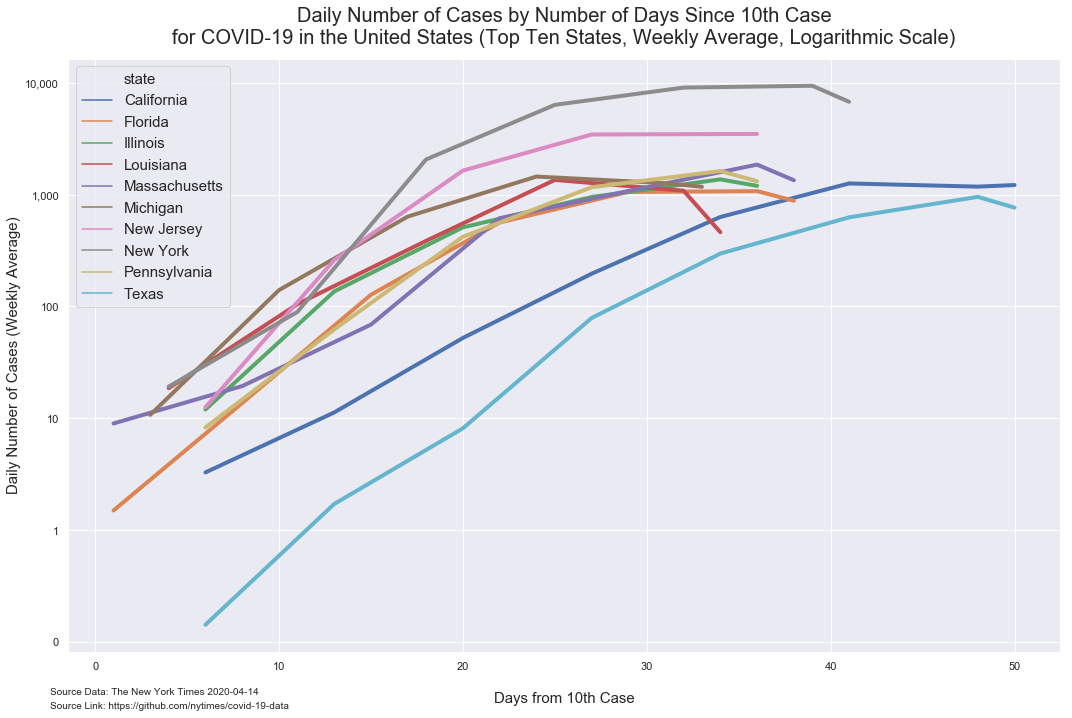

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="daily_cases_week_average",
             hue="state",
             data=state_ten_cases_weekly, linewidth=4)

ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Daily Number of Cases by Number of Days Since 10th Case\nfor COVID-19 in the United States (Top Ten States, Weekly Average, Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-top-10-weekly-log')

# Calculating Growth Rate = Cases Today / Cases the Previous Day

In [46]:
growth_rate = state_ten_cases.sort_values(by=['state', 'date', 'cases'], 
                                                ascending=[True, True, True])

In [47]:
growth_rate.head()

date       state  cases  daily_cases  deaths date_ten_case  \
112 2020-02-24  California     11          1.0       0    2020-02-24   
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   

     days_since_ten_case  
112                    0  
113                    1  
114                    2  
115                    3  
116                    4

In [48]:
growth_rate['growth_rate'] = (growth_rate['daily_cases'] / growth_rate['daily_cases'].shift(1))

In [49]:
growth_rate[50:100]

date       state  cases  daily_cases  deaths date_ten_case  \
162 2020-04-14  California  25758       1424.0     778    2020-02-24   
306 2020-03-07     Florida     12          2.0       2    2020-03-07   
307 2020-03-08     Florida     13          1.0       2    2020-03-07   
308 2020-03-09     Florida     14          1.0       2    2020-03-07   
309 2020-03-10     Florida     23          9.0       2    2020-03-07   
310 2020-03-11     Florida     26          3.0       2    2020-03-07   
311 2020-03-12     Florida     46         20.0       2    2020-03-07   
312 2020-03-13     Florida     70         24.0       2    2020-03-07   
313 2020-03-14     Florida     70          0.0       3    2020-03-07   
314 2020-03-15     Florida    109         39.0       3    2020-03-07   
315 2020-03-16     Florida    141         32.0       4    2020-03-07   
316 2020-03-17     Florida    210         69.0       6    2020-03-07   
317 2020-03-18     Florida    326        116.0       7    2020-03-07   
318 2020-03-19     Florida    434        108.0       8    2020-03-07   
319 2020-03-20     Florida    564        130.0       9    2020-03-07   
320 2020-03-21     Florida    764        200.0      11    2020-03-07   
321 2020-03-22     Florida   1000        236.0      13    2020-03-07   
322 2020-03-23     Florida   1222        222.0      18    2020-03-07   
323 2020-03-24     Florida   1467        245.0      19    2020-03-07   
324 2020-03-25     Florida   1965        498.0      23    2020-03-07   
325 2020-03-26     Florida   2477        512.0      29    2020-03-07   
326 2020-03-27     Florida   3198        721.0      46    2020-03-07   
327 2020-03-28     Florida   4038        840.0      56    2020-03-07   
328 2020-03-29     Florida   4942        904.0      59    2020-03-07   
329 2020-03-30     Florida   5694        752.0      71    2020-03-07   
330 2020-03-31     Florida   6741       1047.0      85    2020-03-07   
331 2020-04-01     Florida   7765       1024.0     100    2020-03-07   
332 2020-04-02     Florida   9000       1235.0     144    2020-03-07   
333 2020-04-03     Florida  10260       1260.0     169    2020-03-07   
334 2020-04-04     Florida  11537       1277.0     194    2020-03-07   
335 2020-04-05     Florida  12342        805.0     220    2020-03-07   
336 2020-04-06     Florida  13621       1279.0     253    2020-03-07   
337 2020-04-07     Florida  14739       1118.0     295    2020-03-07   
338 2020-04-08     Florida  15690        951.0     322    2020-03-07   
339 2020-04-09     Florida  16819       1129.0     370    2020-03-07   
340 2020-04-10     Florida  17960       1141.0     418    2020-03-07   
341 2020-04-11     Florida  18978       1018.0     445    2020-03-07   
342 2020-04-12     Florida  19855        877.0     460    2020-03-07   
343 2020-04-13     Florida  21011       1156.0     498    2020-03-07   
344 2020-04-14     Florida  21620        609.0     570    2020-03-07   
45  2020-03-09    Illinois     11          1.0       0    2020-03-09   
46  2020-03-10    Illinois     19          8.0       0    2020-03-09   
47  2020-03-11    Illinois     25          6.0       0    2020-03-09   
48  2020-03-12    Illinois     32          7.0       0    2020-03-09   
49  2020-03-13    Illinois     46         14.0       0    2020-03-09   
50  2020-03-14    Illinois     66         20.0       0    2020-03-09   
51  2020-03-15    Illinois     94         28.0       0    2020-03-09   
52  2020-03-16    Illinois    104         10.0       0    2020-03-09   
53  2020-03-17    Illinois    159         55.0       1    2020-03-09   
54  2020-03-18    Illinois    286        127.0       1    2020-03-09   

     days_since_ten_case  growth_rate  
162                   50     1.408506  
306                    0     0.001404  
307                    1     0.500000  
308                    2     1.000000  
309                    3     9.000000  
310                    4     0.333333  
311                    5     6.666667  
312              

In [50]:
growth_rate = growth_rate.loc[growth_rate.days_since_ten_case != 0]

In [51]:
growth_rate[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
117 2020-02-29  California     28          1.0       0    2020-02-24   
118 2020-03-01  California     33          5.0       0    2020-02-24   
119 2020-03-02  California     38          5.0       0    2020-02-24   
120 2020-03-03  California     45          7.0       0    2020-02-24   
121 2020-03-04  California     55         10.0       1    2020-02-24   
122 2020-03-05  California     67         12.0       1    2020-02-24   
123 2020-03-06  California     81         14.0       1    2020-02-24   
124 2020-03-07  California    100         19.0       1    2020-02-24   
125 2020-03-08  California    112         12.0       1    2020-02-24   
126 2020-03-09  California    172         60.0       2    2020-02-24   
127 2020-03-10  California    179          7.0       3    2020-02-24   
128 2020-03-11  California    202         23.0       4    2020-02-24   
129 2020-03-12  California    252         50.0       4    2020-02-24   
130 2020-03-13  California    320         68.0       5    2020-02-24   
131 2020-03-14  California    381         61.0       5    2020-02-24   
132 2020-03-15  California    478         97.0       6    2020-02-24   
133 2020-03-16  California    588        110.0      11    2020-02-24   
134 2020-03-17  California    732        144.0      14    2020-02-24   
135 2020-03-18  California    893        161.0      17    2020-02-24   
136 2020-03-19  California   1067        174.0      19    2020-02-24   
137 2020-03-20  California   1283        216.0      24    2020-02-24   
138 2020-03-21  California   1544        261.0      28    2020-02-24   
139 2020-03-22  California   1851        307.0      35    2020-02-24   
140 2020-03-23  California   2240        389.0      39    2020-02-24   
141 2020-03-24  California   2644        404.0      52    2020-02-24   
142 2020-03-25  California   3183        539.0      67    2020-02-24   
143 2020-03-26  California   4060        877.0      82    2020-02-24   
144 2020-03-27  California   4914        854.0     102    2020-02-24   
145 2020-03-28  California   5565        651.0     121    2020-02-24   
146 2020-03-29  California   6266        701.0     130    2020-02-24   
147 2020-03-30  California   7421       1155.0     146    2020-02-24   
148 2020-03-31  California   8582       1161.0     183    2020-02-24   
149 2020-04-01  California   9816       1234.0     212    2020-02-24   
150 2020-04-02  California  11190       1374.0     247    2020-02-24   
151 2020-04-03  California  12569       1379.0     282    2020-02-24   
152 2020-04-04  California  13796       1227.0     323    2020-02-24   
153 2020-04-05  California  15076       1280.0     349    2020-02-24   
154 2020-04-06  California  16284       1208.0     386    2020-02-24   
155 2020-04-07  California  17540       1256.0     447    2020-02-24   
156 2020-04-08  California  19043       1503.0     506    2020-02-24   
157 2020-04-09  California  20191       1148.0     548    2020-02-24   
158 2020-04-10  California  21366       1175.0     594    2020-02-24   
159 2020-04-11  California  22421       1055.0     632    2020-02-24   
160 2020-04-12  California  23323        902.0     676    2020-02-24   
161 2020-04-13  California  24334       1011.0     725    2020-02-24   
162 2020-04-14  California  25758       1424.0     778    2020-02-24   

     days_since_ten_case  growth_rate  
113                    1     0.000000  
114                    2          inf  
115                    3     0.000000  
116                    4          inf  
117                    5     1.000000  
118                    6     5.000000  
119                    7     1.000000  
120              

In [52]:
inf = [np.inf, -np.inf]
growth_rate['growth_rate'] = growth_rate['growth_rate'].replace(inf, np.nan)

In [53]:
growth_rate['growth_rate'] = growth_rate['growth_rate'].fillna(method='ffill')

In [54]:
growth_rate[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
117 2020-02-29  California     28          1.0       0    2020-02-24   
118 2020-03-01  California     33          5.0       0    2020-02-24   
119 2020-03-02  California     38          5.0       0    2020-02-24   
120 2020-03-03  California     45          7.0       0    2020-02-24   
121 2020-03-04  California     55         10.0       1    2020-02-24   
122 2020-03-05  California     67         12.0       1    2020-02-24   
123 2020-03-06  California     81         14.0       1    2020-02-24   
124 2020-03-07  California    100         19.0       1    2020-02-24   
125 2020-03-08  California    112         12.0       1    2020-02-24   
126 2020-03-09  California    172         60.0       2    2020-02-24   
127 2020-03-10  California    179          7.0       3    2020-02-24   
128 2020-03-11  California    202         23.0       4    2020-02-24   
129 2020-03-12  California    252         50.0       4    2020-02-24   
130 2020-03-13  California    320         68.0       5    2020-02-24   
131 2020-03-14  California    381         61.0       5    2020-02-24   
132 2020-03-15  California    478         97.0       6    2020-02-24   
133 2020-03-16  California    588        110.0      11    2020-02-24   
134 2020-03-17  California    732        144.0      14    2020-02-24   
135 2020-03-18  California    893        161.0      17    2020-02-24   
136 2020-03-19  California   1067        174.0      19    2020-02-24   
137 2020-03-20  California   1283        216.0      24    2020-02-24   
138 2020-03-21  California   1544        261.0      28    2020-02-24   
139 2020-03-22  California   1851        307.0      35    2020-02-24   
140 2020-03-23  California   2240        389.0      39    2020-02-24   
141 2020-03-24  California   2644        404.0      52    2020-02-24   
142 2020-03-25  California   3183        539.0      67    2020-02-24   
143 2020-03-26  California   4060        877.0      82    2020-02-24   
144 2020-03-27  California   4914        854.0     102    2020-02-24   
145 2020-03-28  California   5565        651.0     121    2020-02-24   
146 2020-03-29  California   6266        701.0     130    2020-02-24   
147 2020-03-30  California   7421       1155.0     146    2020-02-24   
148 2020-03-31  California   8582       1161.0     183    2020-02-24   
149 2020-04-01  California   9816       1234.0     212    2020-02-24   
150 2020-04-02  California  11190       1374.0     247    2020-02-24   
151 2020-04-03  California  12569       1379.0     282    2020-02-24   
152 2020-04-04  California  13796       1227.0     323    2020-02-24   
153 2020-04-05  California  15076       1280.0     349    2020-02-24   
154 2020-04-06  California  16284       1208.0     386    2020-02-24   
155 2020-04-07  California  17540       1256.0     447    2020-02-24   
156 2020-04-08  California  19043       1503.0     506    2020-02-24   
157 2020-04-09  California  20191       1148.0     548    2020-02-24   
158 2020-04-10  California  21366       1175.0     594    2020-02-24   
159 2020-04-11  California  22421       1055.0     632    2020-02-24   
160 2020-04-12  California  23323        902.0     676    2020-02-24   
161 2020-04-13  California  24334       1011.0     725    2020-02-24   
162 2020-04-14  California  25758       1424.0     778    2020-02-24   

     days_since_ten_case  growth_rate  
113                    1     0.000000  
114                    2     0.000000  
115                    3     0.000000  
116                    4     0.000000  
117                    5     1.000000  
118                    6     5.000000  
119                    7     1.000000  
120              

In [55]:
growth_rate.isna().sum()

date                   0
state                  0
cases                  0
daily_cases            0
deaths                 0
date_ten_case          0
days_since_ten_case    0
growth_rate            0
dtype: int64

In [56]:
growth_rate

date       state  cases  daily_cases  deaths date_ten_case  \
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
117 2020-02-29  California     28          1.0       0    2020-02-24   
..         ...         ...    ...          ...     ...           ...   
295 2020-04-10       Texas  12288        916.0     247    2020-02-24   
296 2020-04-11       Texas  13206        918.0     266    2020-02-24   
297 2020-04-12       Texas  13774        568.0     289    2020-02-24   
298 2020-04-13       Texas  14488        714.0     320    2020-02-24   
299 2020-04-14       Texas  15304        816.0     365    2020-02-24   

     days_since_ten_case  growth_rate  
113                    1     0.000000  
114                    2     0.000000  
115                    3     0.000000  
116                    4     0.000000  
117                    5     1.000000  
..                   ...          ...  
295                   46     0.622283  
296                   47     1.002183  
297                   48     0.618736  
298                   49     1.257042  
299                   50     1.142857  

[392 rows x 8 columns]

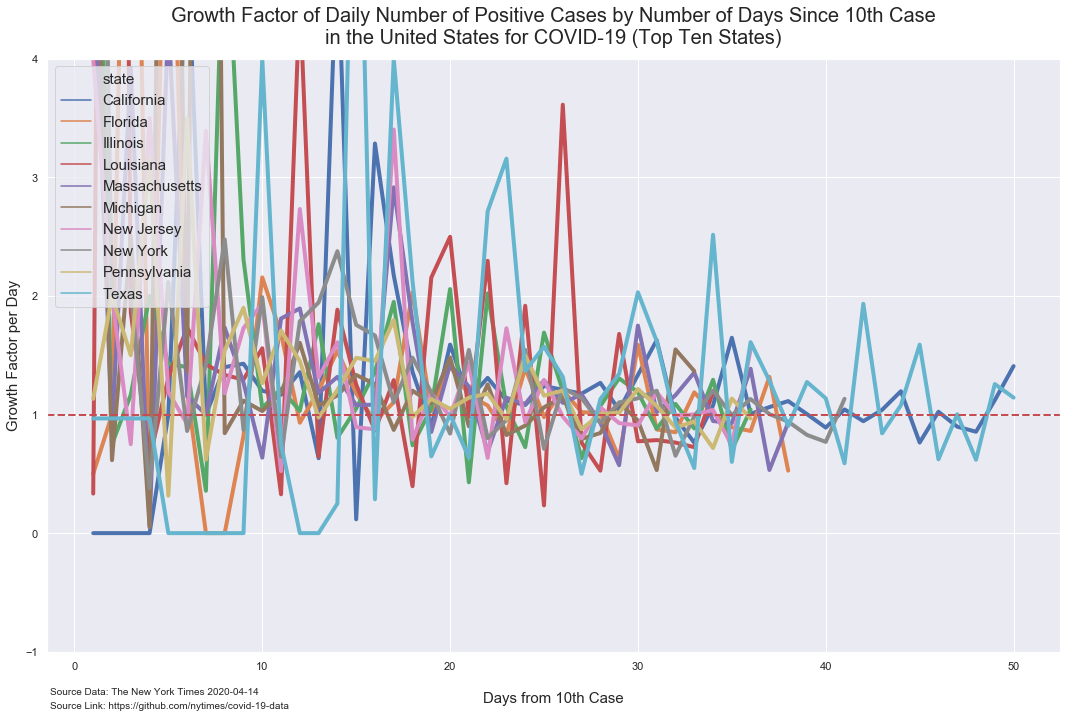

In [57]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="growth_rate",
             hue="state", data=growth_rate , linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(-1, 4)
#plt.xlim(-1, 8)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day', fontsize=15)
plt.title('Growth Factor of Daily Number of Positive Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-daily')

# Weekly Growth Rate

In [58]:
growth_rate_weekly = growth_rate.set_index('date').groupby('state').resample('W').agg({'days_since_ten_case': 
                                                                    np.max, 'growth_rate': np.mean})

In [59]:
growth_rate_weekly

days_since_ten_case  growth_rate
state      date                                        
California 2020-03-01                    6     1.000000
           2020-03-08                   13     1.169137
           2020-03-15                   20     2.060502
           2020-03-22                   27     1.181124
           2020-03-29                   34     1.154254
...                                    ...          ...
Texas      2020-03-22                   27     1.609459
           2020-03-29                   34     1.446912
           2020-04-05                   41     1.057139
           2020-04-12                   48     1.097982
           2020-04-19                   50     1.199950

[67 rows x 2 columns]

In [60]:
growth_rate_weekly.reset_index(inplace=True)
growth_rate_weekly.rename(columns={'growth_rate': 'growth_rate_weekly_average'}, inplace=True)

In [61]:
growth_rate_weekly

state       date  days_since_ten_case  growth_rate_weekly_average
0   California 2020-03-01                    6                    1.000000
1   California 2020-03-08                   13                    1.169137
2   California 2020-03-15                   20                    2.060502
3   California 2020-03-22                   27                    1.181124
4   California 2020-03-29                   34                    1.154254
..         ...        ...                  ...                         ...
62       Texas 2020-03-22                   27                    1.609459
63       Texas 2020-03-29                   34                    1.446912
64       Texas 2020-04-05                   41                    1.057139
65       Texas 2020-04-12                   48                    1.097982
66       Texas 2020-04-19                   50                    1.199950

[67 rows x 4 columns]

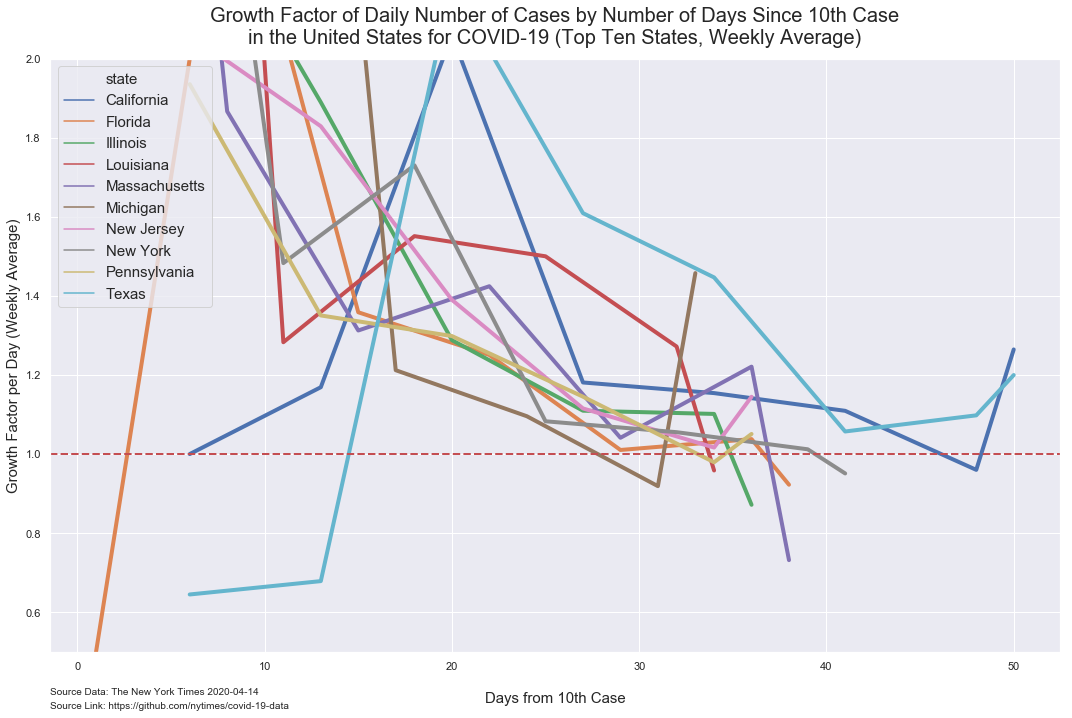

In [62]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="growth_rate_weekly_average",
             hue="state", data=growth_rate_weekly, linewidth=4)

ax1.axhline(1, color='r', lw=2, linestyle='dashed')

ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.ylim(0.5, 2)

ax1.legend(loc='upper left', fontsize=15)
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Growth Factor per Day (Weekly Average)', fontsize=15)
plt.title('Growth Factor of Daily Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top Ten States, Weekly Average)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/growth-factor-top-10-weekly')

# Cumulative Number of Cases

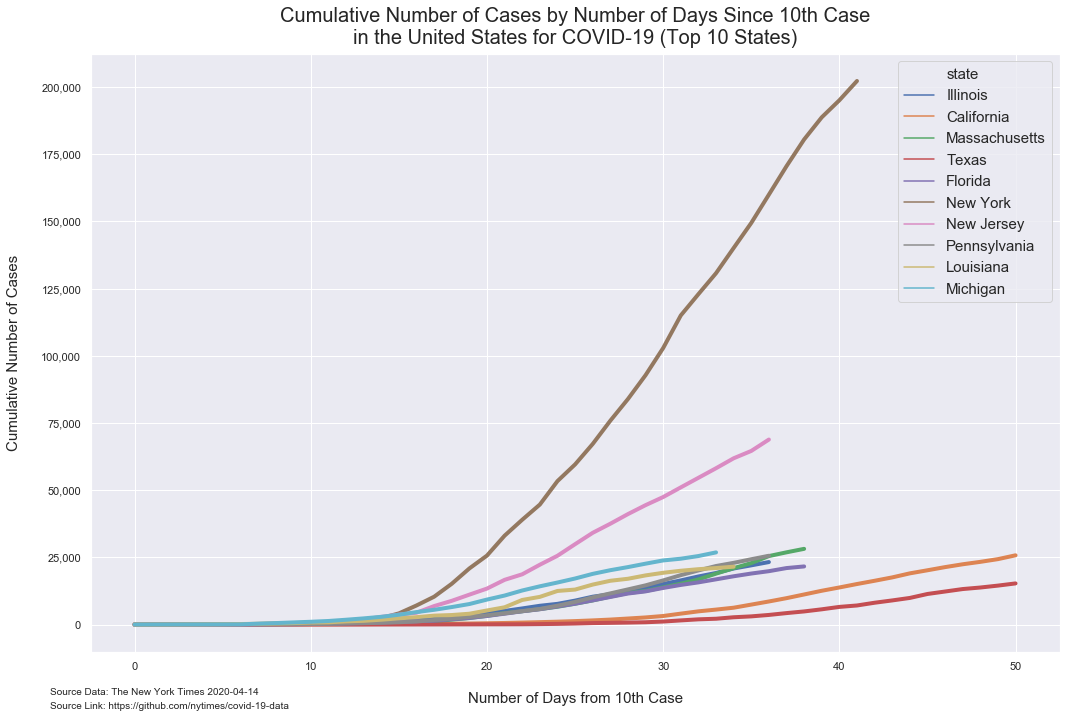

In [63]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top 10 States)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case')

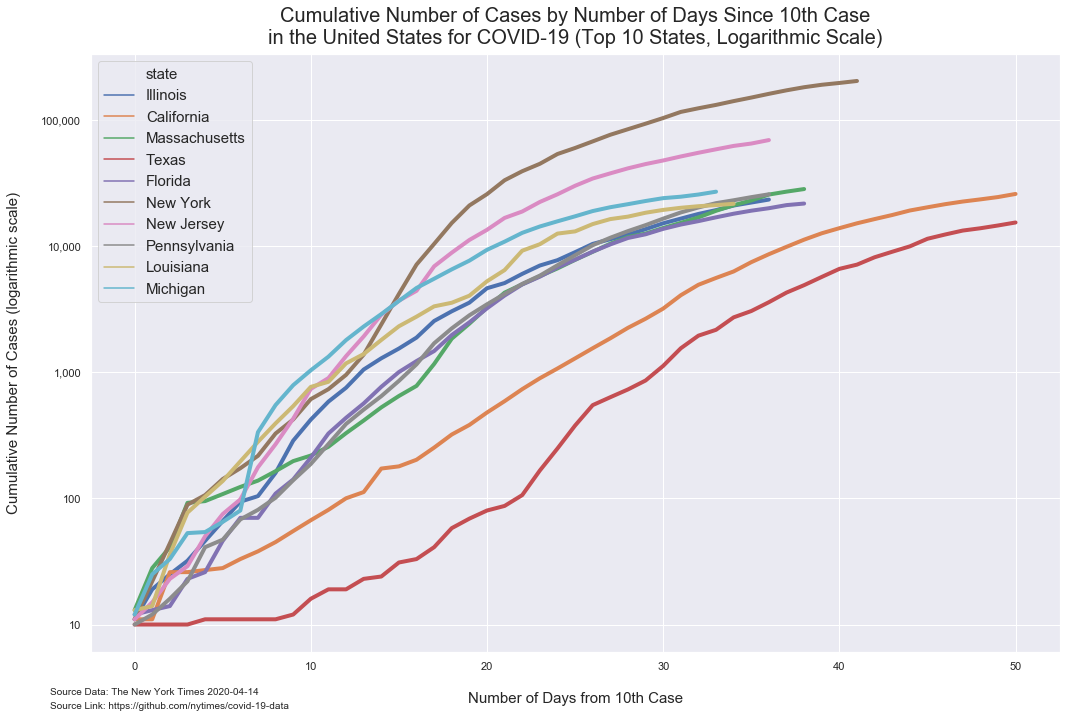

In [64]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_since_ten_case", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)
    
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Number of Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases (logarithmic scale)', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nin the United States for COVID-19 (Top 10 States, Logarithmic Scale)', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-log')

# Cumulative Cases for All States

In [65]:
ten_cases_all_states = covid_19_state_data.loc[covid_19_state_data['cases'] >= 10]

In [66]:
ten_cases_all_states = ten_cases_all_states.sort_values(by=['date', 'cases'], 
                                ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [67]:
ten_cases_all_states = ten_cases_all_states[['state', 'date']]
ten_cases_all_states.rename(columns={'date': 'ten_cases_date'}, inplace=True)

In [68]:
ten_cases_all_states

state ten_cases_date
0                   Nebraska     2020-02-17
1                      Texas     2020-02-24
2                 California     2020-02-24
3                 Washington     2020-02-29
4                   New York     2020-03-04
5                    Florida     2020-03-07
6              Massachusetts     2020-03-07
7                    Georgia     2020-03-08
8                     Oregon     2020-03-08
9               Pennsylvania     2020-03-09
10                  Illinois     2020-03-09
11                New Jersey     2020-03-09
12                  Colorado     2020-03-09
13                      Iowa     2020-03-10
14      District of Columbia     2020-03-11
15            South Carolina     2020-03-11
16                  Virginia     2020-03-11
17                   Indiana     2020-03-11
18                 Louisiana     2020-03-11
19                  Maryland     2020-03-11
20                  Kentucky     2020-03-12
21                    Nevada     2020-03-12
22                  Michigan     2020-03-12
23            North Carolina     2020-03-12
24                 Tennessee     2020-03-12
25                New Mexico     2020-03-13
26               Connecticut     2020-03-13
27                      Ohio     2020-03-13
28                 Minnesota     2020-03-13
29                 Wisconsin     2020-03-13
30              Rhode Island     2020-03-13
31                   Alabama     2020-03-14
32                   Arizona     2020-03-14
33                      Utah     2020-03-14
34               Mississippi     2020-03-15
35                     Maine     2020-03-15
36             New Hampshire     2020-03-15
37                  Arkansas     2020-03-15
38                    Hawaii     2020-03-16
39                  Oklahoma     2020-03-16
40              South Dakota     2020-03-16
41                   Wyoming     2020-03-16
42                    Kansas     2020-03-16
43                   Vermont     2020-03-16
44                  Delaware     2020-03-17
45                  Missouri     2020-03-17
46                     Idaho     2020-03-18
47                   Montana     2020-03-18
48                    Alaska     2020-03-19
49                      Guam     2020-03-19
50              North Dakota     2020-03-19
51               Puerto Rico     2020-03-20
52             West Virginia     2020-03-21
53            Virgin Islands     2020-03-22
54  Northern Mariana Islands     2020-04-08

In [69]:
ten_cases_all_states = covid_19_state_data.merge(ten_cases_all_states, left_on='state', right_on='state')

In [70]:
ten_cases_all_states = ten_cases_all_states.loc[ten_cases_all_states['cases'] >= 10]

In [71]:
ten_cases_all_states

date                     state  fips  cases  deaths ten_cases_date
39   2020-02-29                Washington    53     10       1     2020-02-29
40   2020-03-01                Washington    53     17       3     2020-02-29
41   2020-03-02                Washington    53     23       6     2020-02-29
42   2020-03-03                Washington    53     32      10     2020-02-29
43   2020-03-04                Washington    53     47      11     2020-02-29
...         ...                       ...   ...    ...     ...            ...
2374 2020-04-10  Northern Mariana Islands    69     11       2     2020-04-08
2375 2020-04-11  Northern Mariana Islands    69     11       2     2020-04-08
2376 2020-04-12  Northern Mariana Islands    69     11       2     2020-04-08
2377 2020-04-13  Northern Mariana Islands    69     11       2     2020-04-08
2378 2020-04-14  Northern Mariana Islands    69     13       2     2020-04-08

[1841 rows x 6 columns]

In [72]:
ten_cases_all_states['days_from_10_cases'] = (ten_cases_all_states['date'] - 
                                              ten_cases_all_states['ten_cases_date']).dt.days

In [73]:
ten_cases_all_states

date                     state  fips  cases  deaths ten_cases_date  \
39   2020-02-29                Washington    53     10       1     2020-02-29   
40   2020-03-01                Washington    53     17       3     2020-02-29   
41   2020-03-02                Washington    53     23       6     2020-02-29   
42   2020-03-03                Washington    53     32      10     2020-02-29   
43   2020-03-04                Washington    53     47      11     2020-02-29   
...         ...                       ...   ...    ...     ...            ...   
2374 2020-04-10  Northern Mariana Islands    69     11       2     2020-04-08   
2375 2020-04-11  Northern Mariana Islands    69     11       2     2020-04-08   
2376 2020-04-12  Northern Mariana Islands    69     11       2     2020-04-08   
2377 2020-04-13  Northern Mariana Islands    69     11       2     2020-04-08   
2378 2020-04-14  Northern Mariana Islands    69     13       2     2020-04-08   

      days_from_10_cases  
39                     0  
40                     1  
41                     2  
42                     3  
43                     4  
...                  ...  
2374                   2  
2375                   3  
2376                   4  
2377                   5  
2378                   6  

[1841 rows x 7 columns]

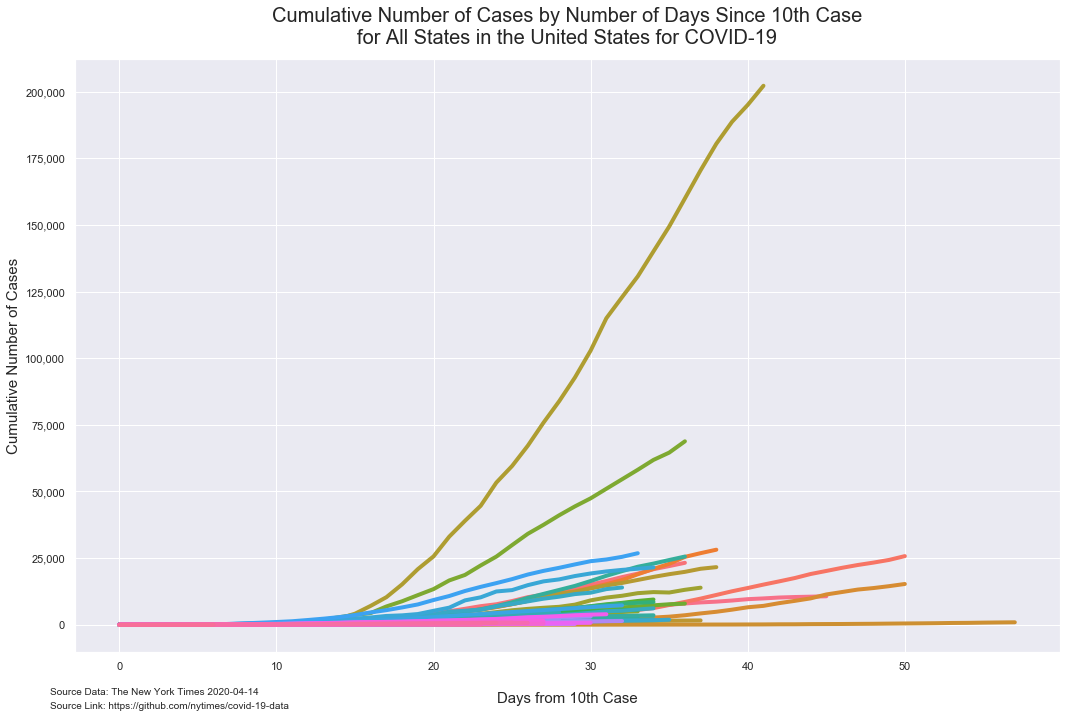

In [74]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=ten_cases_all_states, linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Case', fontsize=15)
ax1.set_ylabel('Cumulative Number of Cases', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nfor All States in the United States for COVID-19', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state')

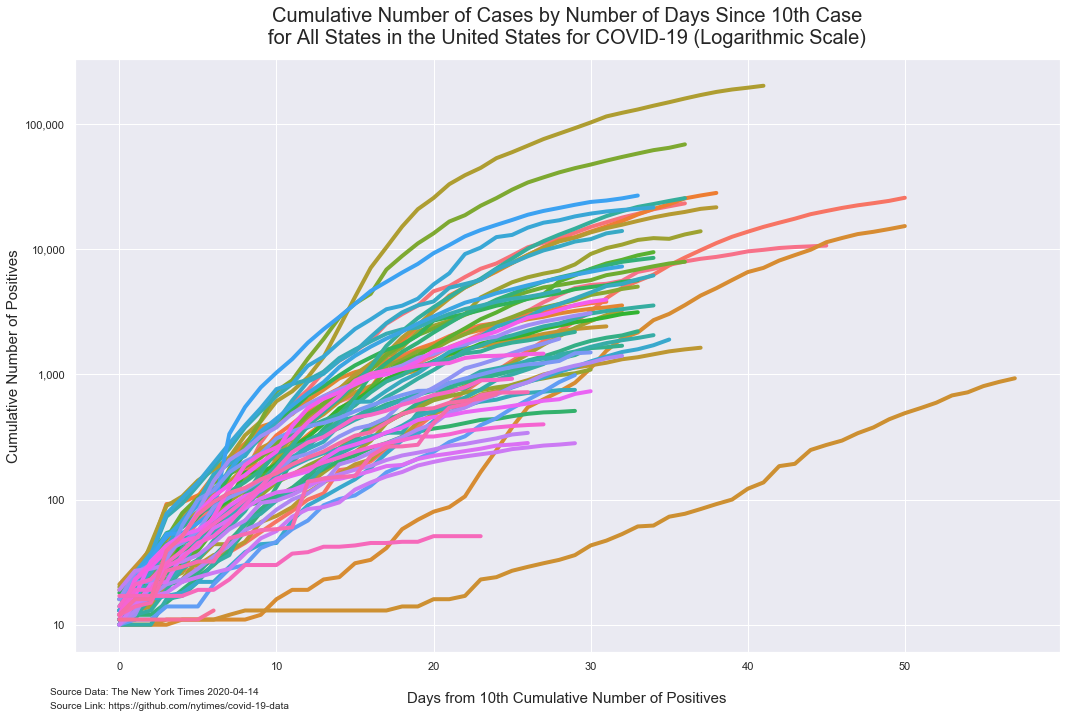

In [75]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="days_from_10_cases", y="cases",
             hue="state",
             data=ten_cases_all_states, linewidth=4)
ax1.set_yscale('log')

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend_.remove()
ax1.set_xlabel('Days from 10th Cumulative Number of Positives', fontsize=15)
ax1.set_ylabel('Cumulative Number of Positives', fontsize=15)
plt.title('Cumulative Number of Cases by Number of Days Since 10th Case\nfor All States in the United States for COVID-19 (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/10-cases-timeseries-by-state-log')

# Trajectory Plots = daily number (log) vs. total number (log) 

## Daily

In [76]:
trajectory_plot = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [77]:
trajectory_plot[:50]

date       state  cases  daily_cases  deaths date_ten_case  \
112 2020-02-24  California     11          1.0       0    2020-02-24   
113 2020-02-25  California     11          0.0       0    2020-02-24   
114 2020-02-26  California     26         15.0       0    2020-02-24   
115 2020-02-27  California     26          0.0       0    2020-02-24   
116 2020-02-28  California     27          1.0       0    2020-02-24   
117 2020-02-29  California     28          1.0       0    2020-02-24   
118 2020-03-01  California     33          5.0       0    2020-02-24   
119 2020-03-02  California     38          5.0       0    2020-02-24   
120 2020-03-03  California     45          7.0       0    2020-02-24   
121 2020-03-04  California     55         10.0       1    2020-02-24   
122 2020-03-05  California     67         12.0       1    2020-02-24   
123 2020-03-06  California     81         14.0       1    2020-02-24   
124 2020-03-07  California    100         19.0       1    2020-02-24   
125 2020-03-08  California    112         12.0       1    2020-02-24   
126 2020-03-09  California    172         60.0       2    2020-02-24   
127 2020-03-10  California    179          7.0       3    2020-02-24   
128 2020-03-11  California    202         23.0       4    2020-02-24   
129 2020-03-12  California    252         50.0       4    2020-02-24   
130 2020-03-13  California    320         68.0       5    2020-02-24   
131 2020-03-14  California    381         61.0       5    2020-02-24   
132 2020-03-15  California    478         97.0       6    2020-02-24   
133 2020-03-16  California    588        110.0      11    2020-02-24   
134 2020-03-17  California    732        144.0      14    2020-02-24   
135 2020-03-18  California    893        161.0      17    2020-02-24   
136 2020-03-19  California   1067        174.0      19    2020-02-24   
137 2020-03-20  California   1283        216.0      24    2020-02-24   
138 2020-03-21  California   1544        261.0      28    2020-02-24   
139 2020-03-22  California   1851        307.0      35    2020-02-24   
140 2020-03-23  California   2240        389.0      39    2020-02-24   
141 2020-03-24  California   2644        404.0      52    2020-02-24   
142 2020-03-25  California   3183        539.0      67    2020-02-24   
143 2020-03-26  California   4060        877.0      82    2020-02-24   
144 2020-03-27  California   4914        854.0     102    2020-02-24   
145 2020-03-28  California   5565        651.0     121    2020-02-24   
146 2020-03-29  California   6266        701.0     130    2020-02-24   
147 2020-03-30  California   7421       1155.0     146    2020-02-24   
148 2020-03-31  California   8582       1161.0     183    2020-02-24   
149 2020-04-01  California   9816       1234.0     212    2020-02-24   
150 2020-04-02  California  11190       1374.0     247    2020-02-24   
151 2020-04-03  California  12569       1379.0     282    2020-02-24   
152 2020-04-04  California  13796       1227.0     323    2020-02-24   
153 2020-04-05  California  15076       1280.0     349    2020-02-24   
154 2020-04-06  California  16284       1208.0     386    2020-02-24   
155 2020-04-07  California  17540       1256.0     447    2020-02-24   
156 2020-04-08  California  19043       1503.0     506    2020-02-24   
157 2020-04-09  California  20191       1148.0     548    2020-02-24   
158 2020-04-10  California  21366       1175.0     594    2020-02-24   
159 2020-04-11  California  22421       1055.0     632    2020-02-24   
160 2020-04-12  California  23323        902.0     676    2020-02-24   
161 2020-04-13  California  24334       1011.0     725    2020-02-24   

     days_since_ten_case  
112                    0  
113                    1  
114                    2  
115                    3  
116                    4  
117                    5  
118                    6  
119                    7  
120                    8  
121                    9  
122                   10  
123          

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


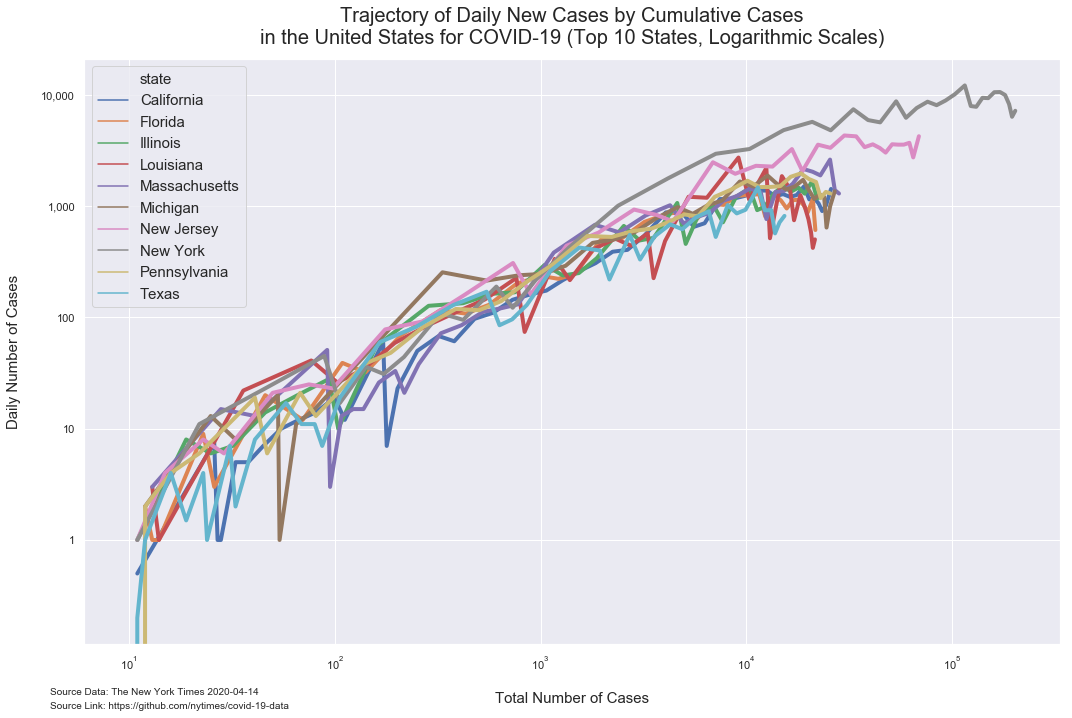

In [78]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases",
             hue="state",
             data=trajectory_plot, linewidth=4, ci=False)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Top 10 States, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-daily-plot')

## Weekly

In [79]:
trajectory_plot_weekly = trajectory_plot[['state', 'date', 'cases', 'daily_cases']]

In [80]:
trajectory_plot_weekly.head()

state       date  cases  daily_cases
112  California 2020-02-24     11          1.0
113  California 2020-02-25     11          0.0
114  California 2020-02-26     26         15.0
115  California 2020-02-27     26          0.0
116  California 2020-02-28     27          1.0

In [81]:
trajectory_plot_weekly = trajectory_plot.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                               'daily_cases': np.mean})

In [82]:
trajectory_plot_weekly

cases  daily_cases
state      date                          
California 2020-03-01     33     3.285714
           2020-03-08    112    11.285714
           2020-03-15    478    52.285714
           2020-03-22   1851   196.142857
           2020-03-29   6266   630.714286
...                      ...          ...
Texas      2020-03-22    632    78.857143
           2020-03-29   2712   297.142857
           2020-04-05   7094   626.000000
           2020-04-12  13774   954.285714
           2020-04-19  15304   765.000000

[67 rows x 2 columns]

In [83]:
trajectory_plot_weekly.reset_index(inplace=True)

In [84]:
trajectory_plot_weekly.rename(columns={'daily_cases': 'daily_cases_weekly_average'}, inplace=True)

In [85]:
trajectory_plot_weekly

state       date  cases  daily_cases_weekly_average
0   California 2020-03-01     33                    3.285714
1   California 2020-03-08    112                   11.285714
2   California 2020-03-15    478                   52.285714
3   California 2020-03-22   1851                  196.142857
4   California 2020-03-29   6266                  630.714286
..         ...        ...    ...                         ...
62       Texas 2020-03-22    632                   78.857143
63       Texas 2020-03-29   2712                  297.142857
64       Texas 2020-04-05   7094                  626.000000
65       Texas 2020-04-12  13774                  954.285714
66       Texas 2020-04-19  15304                  765.000000

[67 rows x 4 columns]

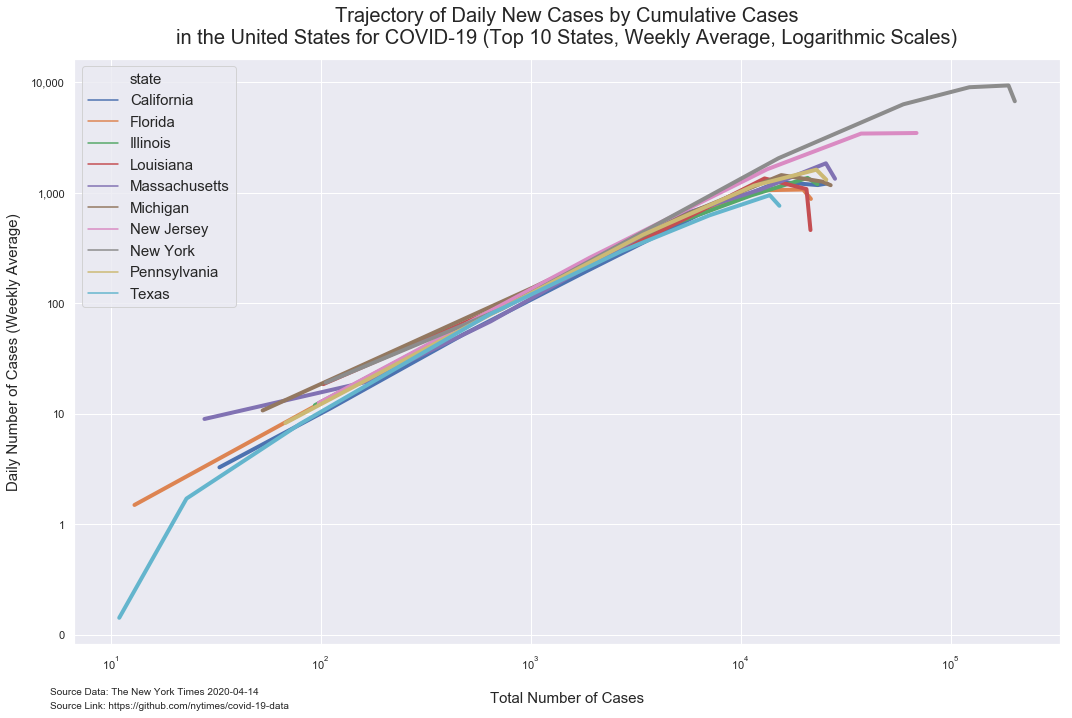

In [86]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_weekly_average",
             hue="state",
             data=trajectory_plot_weekly, linewidth=4)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 10

ax1.legend(fontsize=15)
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Top 10 States, Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-weekly-plot')

# Trajectory for All States

In [87]:
trajectory_all_states = covid_19_state_data.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [88]:
trajectory_all_states

date    state  fips  cases  deaths
586  2020-03-13  Alabama     1      6       0
637  2020-03-14  Alabama     1     12       0
689  2020-03-15  Alabama     1     23       0
742  2020-03-16  Alabama     1     29       0
795  2020-03-17  Alabama     1     39       0
...         ...      ...   ...    ...     ...
2160 2020-04-10  Wyoming    56    253       0
2216 2020-04-11  Wyoming    56    261       0
2272 2020-04-12  Wyoming    56    270       0
2328 2020-04-13  Wyoming    56    275       1
2384 2020-04-14  Wyoming    56    282       1

[2385 rows x 5 columns]

In [89]:
trajectory_all_states['daily_cases'] = trajectory_all_states['cases'].diff()

In [90]:
trajectory_all_states[:50]

date    state  fips  cases  deaths  daily_cases
586  2020-03-13  Alabama     1      6       0          NaN
637  2020-03-14  Alabama     1     12       0          6.0
689  2020-03-15  Alabama     1     23       0         11.0
742  2020-03-16  Alabama     1     29       0          6.0
795  2020-03-17  Alabama     1     39       0         10.0
849  2020-03-18  Alabama     1     51       0         12.0
903  2020-03-19  Alabama     1     78       0         27.0
957  2020-03-20  Alabama     1    106       0         28.0
1011 2020-03-21  Alabama     1    131       0         25.0
1065 2020-03-22  Alabama     1    157       0         26.0
1119 2020-03-23  Alabama     1    196       0         39.0
1173 2020-03-24  Alabama     1    242       0         46.0
1227 2020-03-25  Alabama     1    386       1        144.0
1281 2020-03-26  Alabama     1    538       3        152.0
1335 2020-03-27  Alabama     1    639       4        101.0
1389 2020-03-28  Alabama     1    720       4         81.0
1444 2020-03-29  Alabama     1    830       5        110.0
1499 2020-03-30  Alabama     1    947      11        117.0
1554 2020-03-31  Alabama     1    999      13         52.0
1609 2020-04-01  Alabama     1   1106      28        107.0
1664 2020-04-02  Alabama     1   1270      32        164.0
1719 2020-04-03  Alabama     1   1535      38        265.0
1774 2020-04-04  Alabama     1   1633      44         98.0
1829 2020-04-05  Alabama     1   1841      45        208.0
1884 2020-04-06  Alabama     1   2006      53        165.0
1939 2020-04-07  Alabama     1   2197      64        191.0
1994 2020-04-08  Alabama     1   2499      67        302.0
2049 2020-04-09  Alabama     1   2838      78        339.0
2105 2020-04-10  Alabama     1   3008      80        170.0
2161 2020-04-11  Alabama     1   3262      93        254.0
2217 2020-04-12  Alabama     1   3583      93        321.0
2273 2020-04-13  Alabama     1   3805     104        222.0
2329 2020-04-14  Alabama     1   3953     114        148.0
539  2020-03-12   Alaska     2      1       0      -3952.0
587  2020-03-13   Alaska     2      1       0          0.0
638  2020-03-14   Alaska     2      1       0          0.0
690  2020-03-15   Alaska     2      1       0          0.0
743  2020-03-16   Alaska     2      3       0          2.0
796  2020-03-17   Alaska     2      6       0          3.0
850  2020-03-18   Alaska     2      9       0          3.0
904  2020-03-19   Alaska     2     12       0          3.0
958  2020-03-20   Alaska     2     14       0          2.0
1012 2020-03-21   Alaska     2     21       0          7.0
1066 2020-03-22   Alaska     2     22       0          1.0
1120 2020-03-23   Alaska     2     36       0         14.0
1174 2020-03-24   Alaska     2     42       0          6.0
1228 2020-03-25   Alaska     2     59       0         17.0
1282 2020-03-26   Alaska     2     69       0         10.0
1336 2020-03-27   Alaska     2     85       1         16.0
1390 2020-03-28   Alaska     2    102       1         17.0

In [91]:
trajectory_all_states['daily_cases'].loc[trajectory_all_states.daily_cases < 0] = trajectory_all_states.cases
trajectory_all_states['daily_cases'].loc[trajectory_all_states.daily_cases.isnull()] = trajectory_all_states.cases

In [92]:
trajectory_all_states[:50]

date    state  fips  cases  deaths  daily_cases
586  2020-03-13  Alabama     1      6       0          6.0
637  2020-03-14  Alabama     1     12       0          6.0
689  2020-03-15  Alabama     1     23       0         11.0
742  2020-03-16  Alabama     1     29       0          6.0
795  2020-03-17  Alabama     1     39       0         10.0
849  2020-03-18  Alabama     1     51       0         12.0
903  2020-03-19  Alabama     1     78       0         27.0
957  2020-03-20  Alabama     1    106       0         28.0
1011 2020-03-21  Alabama     1    131       0         25.0
1065 2020-03-22  Alabama     1    157       0         26.0
1119 2020-03-23  Alabama     1    196       0         39.0
1173 2020-03-24  Alabama     1    242       0         46.0
1227 2020-03-25  Alabama     1    386       1        144.0
1281 2020-03-26  Alabama     1    538       3        152.0
1335 2020-03-27  Alabama     1    639       4        101.0
1389 2020-03-28  Alabama     1    720       4         81.0
1444 2020-03-29  Alabama     1    830       5        110.0
1499 2020-03-30  Alabama     1    947      11        117.0
1554 2020-03-31  Alabama     1    999      13         52.0
1609 2020-04-01  Alabama     1   1106      28        107.0
1664 2020-04-02  Alabama     1   1270      32        164.0
1719 2020-04-03  Alabama     1   1535      38        265.0
1774 2020-04-04  Alabama     1   1633      44         98.0
1829 2020-04-05  Alabama     1   1841      45        208.0
1884 2020-04-06  Alabama     1   2006      53        165.0
1939 2020-04-07  Alabama     1   2197      64        191.0
1994 2020-04-08  Alabama     1   2499      67        302.0
2049 2020-04-09  Alabama     1   2838      78        339.0
2105 2020-04-10  Alabama     1   3008      80        170.0
2161 2020-04-11  Alabama     1   3262      93        254.0
2217 2020-04-12  Alabama     1   3583      93        321.0
2273 2020-04-13  Alabama     1   3805     104        222.0
2329 2020-04-14  Alabama     1   3953     114        148.0
539  2020-03-12   Alaska     2      1       0          1.0
587  2020-03-13   Alaska     2      1       0          0.0
638  2020-03-14   Alaska     2      1       0          0.0
690  2020-03-15   Alaska     2      1       0          0.0
743  2020-03-16   Alaska     2      3       0          2.0
796  2020-03-17   Alaska     2      6       0          3.0
850  2020-03-18   Alaska     2      9       0          3.0
904  2020-03-19   Alaska     2     12       0          3.0
958  2020-03-20   Alaska     2     14       0          2.0
1012 2020-03-21   Alaska     2     21       0          7.0
1066 2020-03-22   Alaska     2     22       0          1.0
1120 2020-03-23   Alaska     2     36       0         14.0
1174 2020-03-24   Alaska     2     42       0          6.0
1228 2020-03-25   Alaska     2     59       0         17.0
1282 2020-03-26   Alaska     2     69       0         10.0
1336 2020-03-27   Alaska     2     85       1         16.0
1390 2020-03-28   Alaska     2    102       1         17.0

In [93]:
trajectory_all_states = trajectory_all_states.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                                    'daily_cases': np.mean})
trajectory_all_states.reset_index(inplace=True)
trajectory_all_states.rename(columns={'daily_cases': 'daily_cases_week_avg'}, inplace=True)

In [94]:
trajectory_all_states.head()

state       date  cases  daily_cases_week_avg
0  Alabama 2020-03-15     23              7.666667
1  Alabama 2020-03-22    157             19.142857
2  Alabama 2020-03-29    830             96.142857
3  Alabama 2020-04-05   1841            144.428571
4  Alabama 2020-04-12   3583            248.857143

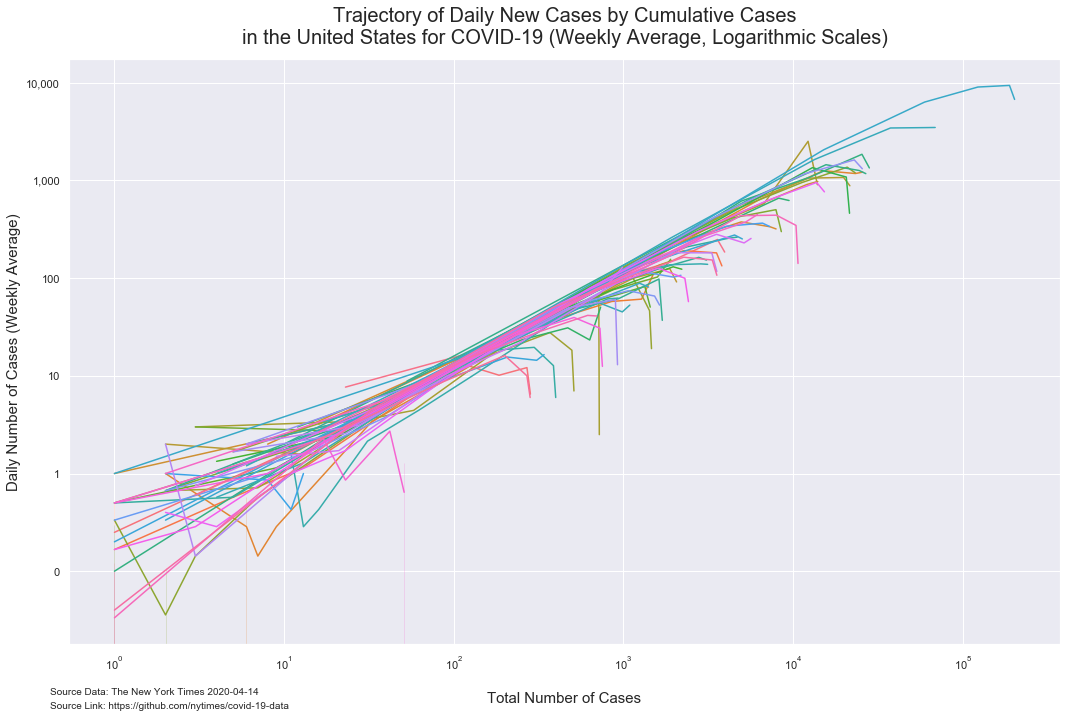

In [95]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot')

In [96]:
trajectory_all_states_scatter = trajectory_all_states.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False]).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [97]:
trajectory_all_states_scatter

state       date   cases  daily_cases_week_avg
0                   New York 2020-04-19  202208                6757.0
1                 New Jersey 2020-04-19   68824                3487.0
2              Massachusetts 2020-04-19   28163                1344.0
3                   Michigan 2020-04-19   26844                1175.0
4                 California 2020-04-19   25758                1217.5
5               Pennsylvania 2020-04-19   25591                1318.0
6                   Illinois 2020-04-19   23247                1197.5
7                    Florida 2020-04-19   21620                 882.5
8                  Louisiana 2020-04-19   21518                 461.5
9                      Texas 2020-04-19   15304                 765.0
10               Connecticut 2020-04-19   13989                 977.0
11                   Georgia 2020-04-19   13913                 905.0
12                Washington 2020-04-19   10694                 141.5
13                  Maryland 2020-04-19    9472                 623.5
14                   Indiana 2020-04-19    8527                 299.5
15                  Colorado 2020-04-19    7941                 319.0
16                      Ohio 2020-04-19    7280                 338.0
17                  Virginia 2020-04-19    6171                 448.5
18                 Tennessee 2020-04-19    5654                 255.0
19            North Carolina 2020-04-19    5024                 252.0
20                  Missouri 2020-04-19    4686                 263.0
21                   Alabama 2020-04-19    3953                 185.0
22                   Arizona 2020-04-19    3806                 133.5
23                 Wisconsin 2020-04-19    3555                 107.0
24            South Carolina 2020-04-19    3553                 117.0
25              Rhode Island 2020-04-19    3251                 293.0
26                    Nevada 2020-04-19    3137                 138.5
27               Mississippi 2020-04-19    3087                 153.0
28                      Utah 2020-04-19    2418                  57.5
29                  Kentucky 2020-04-19    2210                 123.5
30                  Oklahoma 2020-04-19    2184                 107.0
31      District of Columbia 2020-04-19    2058                  91.5
32                  Delaware 2020-04-19    1926                 150.5
33                      Iowa 2020-04-19    1899                 156.0
34                 Minnesota 2020-04-19    1695                  37.0
35                    Oregon 2020-04-19    1633                  53.0
36                  Arkansas 2020-04-19    1498                 109.0
37                     Idaho 2020-04-19    1464                  19.0
38                    Kansas 2020-04-19    1439                  50.5
39                New Mexico 2020-04-19    1407                  81.0
40             New Hampshire 2020-04-19    1091                  53.0
41              South Dakota 2020-04-19     988                 129.0
42                  Nebraska 2020-04-19     931                  62.5
43               Puerto Rico 2020-04-19     923                  13.0
44                   Vermont 2020-04-19     752                  12.5
45                     Maine 2020-04-19     734                  50.5
46                      Guam 2020-04-19     721                   2.5
47             West Virginia 2020-04-19     697                  41.0
48                    Hawaii 2020-04-19     511                   7.0
49                   Montana 2020-04-19     399                   6.0
50              North Dakota 2020-04-19     341                  16.5
51                    Alaska 2020-04-19     283                   6.5
52                   Wyoming 2020-04-19     282                   6.0
53            Virgin Islands 2020-04-19      51                   0.0
54  Northern Mariana Islands 2020-04-19      13                   1.0
55            American Samoa 2020-04-19       0                   0.0

In [98]:
len(trajectory_all_states_scatter)

56

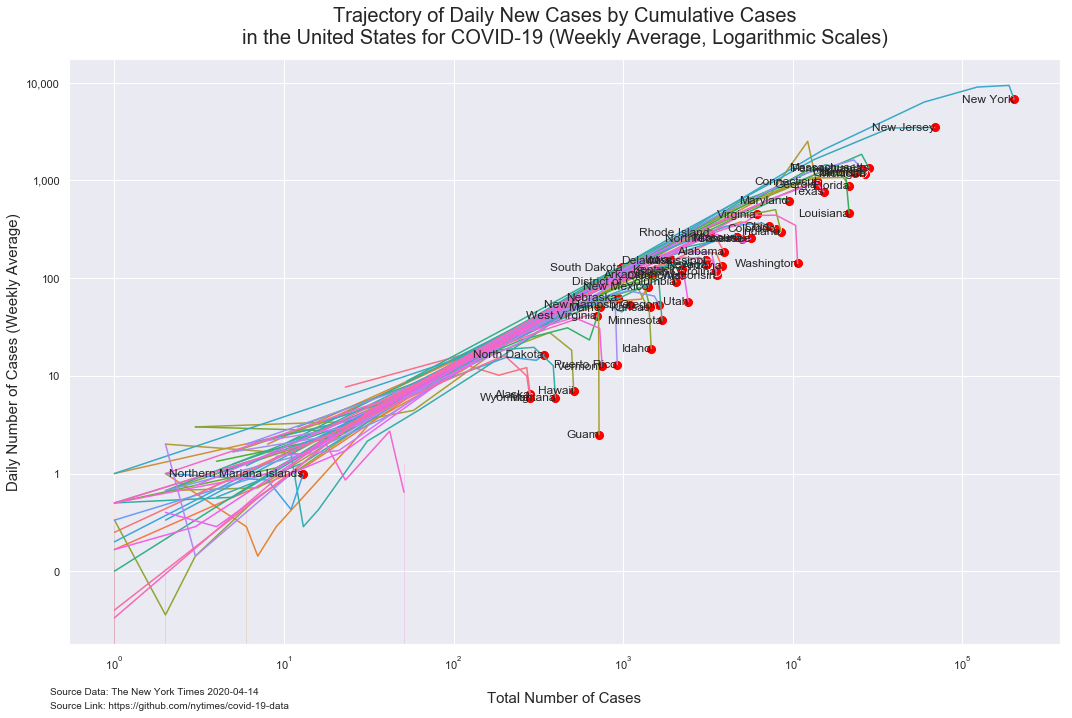

In [99]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="daily_cases_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.daily_cases_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels')

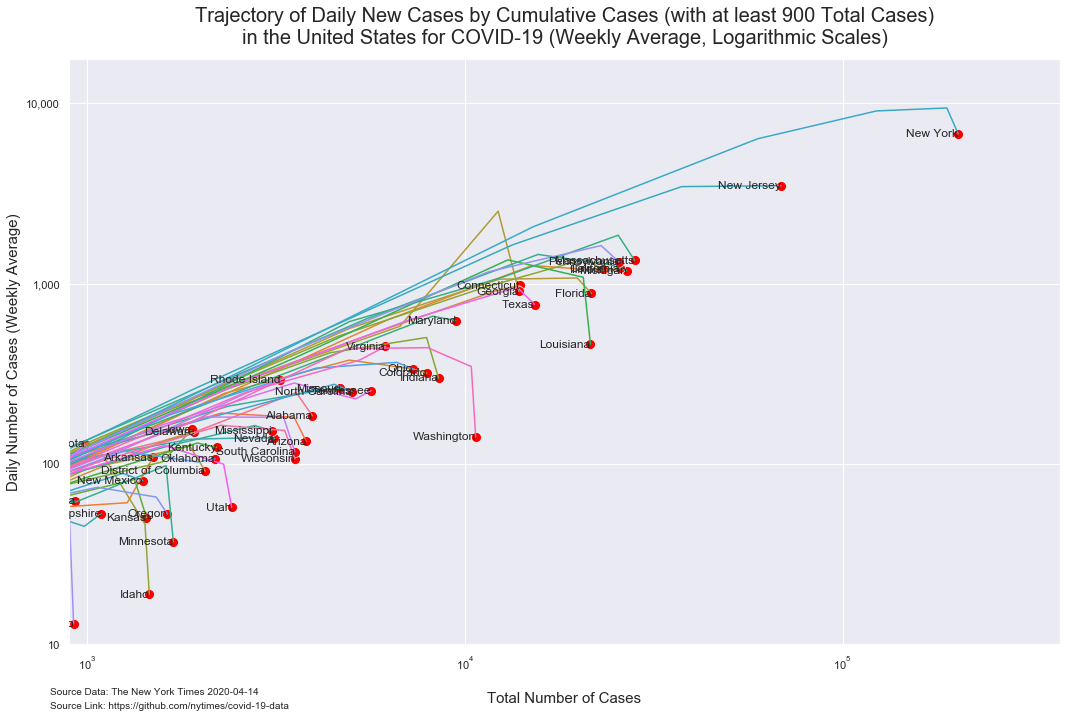

In [100]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="daily_cases_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.daily_cases_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12,
                 horizontalalignment='right', va='center', clip_on=True)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

plt.xlim(900)
plt.ylim(10)


ax1.legend_.remove()
ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of Daily New Cases by Cumulative Cases (with at least 900 Total Cases)\nin the United States for COVID-19 (Weekly Average, Logarithmic Scales)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels-xlimit')

# Timeseries for USA

In [101]:
g = covid_19_state_data.groupby('date')['cases'].sum().reset_index()

g.set_index('date', drop=False, inplace=True)

g.index = pd.to_datetime(g.index, infer_datetime_format=True)

In [102]:
g.index.dtype

dtype('<M8[ns]')

In [103]:
g.head()

date  cases
date                        
2020-01-21 2020-01-21      1
2020-01-22 2020-01-22      1
2020-01-23 2020-01-23      1
2020-01-24 2020-01-24      2
2020-01-25 2020-01-25      3

In [104]:
g.tail()

date   cases
date                         
2020-04-10 2020-04-10  496912
2020-04-11 2020-04-11  528395
2020-04-12 2020-04-12  555325
2020-04-13 2020-04-13  580878
2020-04-14 2020-04-14  607318

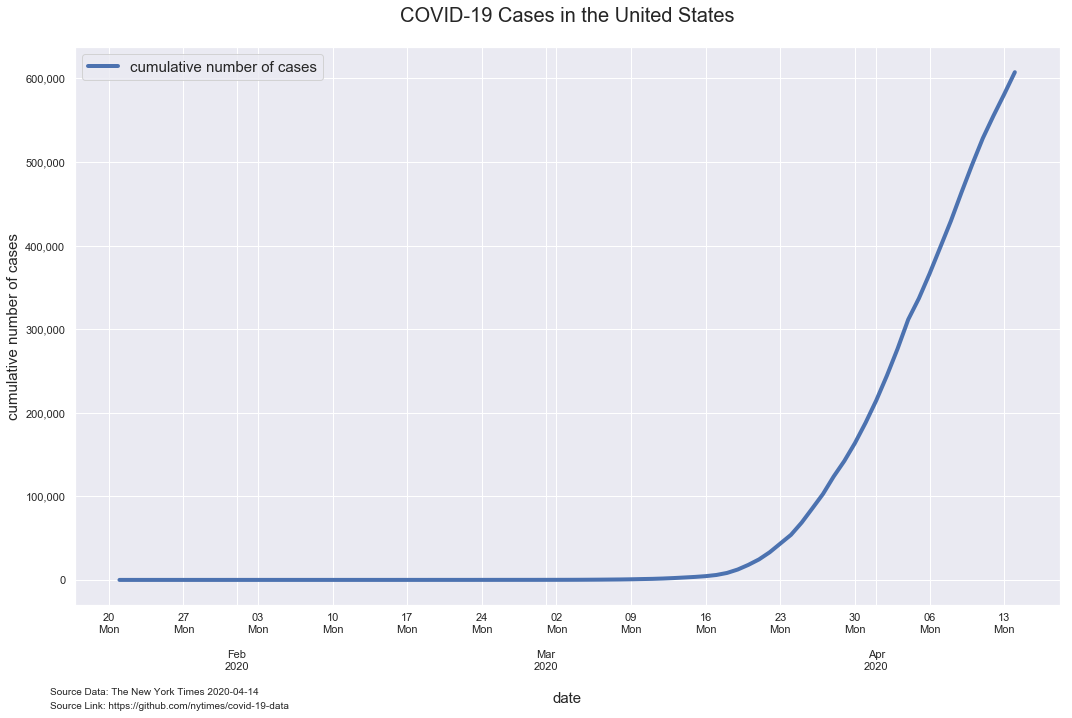

In [105]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax1.plot(g['cases'], linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.set_ylabel('cumulative number of cases', fontsize=15)

ax1.grid(True)
ax1.grid(which='minor')

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-linear')

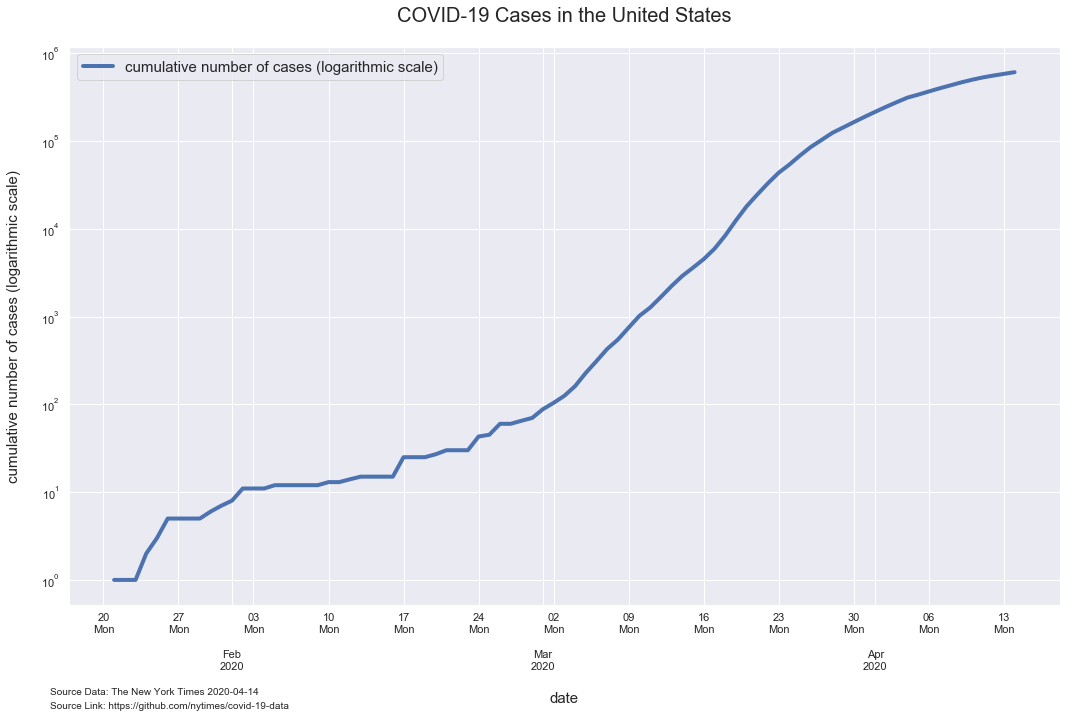

In [106]:
fig, ax2 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax2.plot(g['cases'], linewidth=4)

ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, labelpad = 20)

ax2.grid(True)
ax2.grid(which='minor', axis='x')

ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=0, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-log')

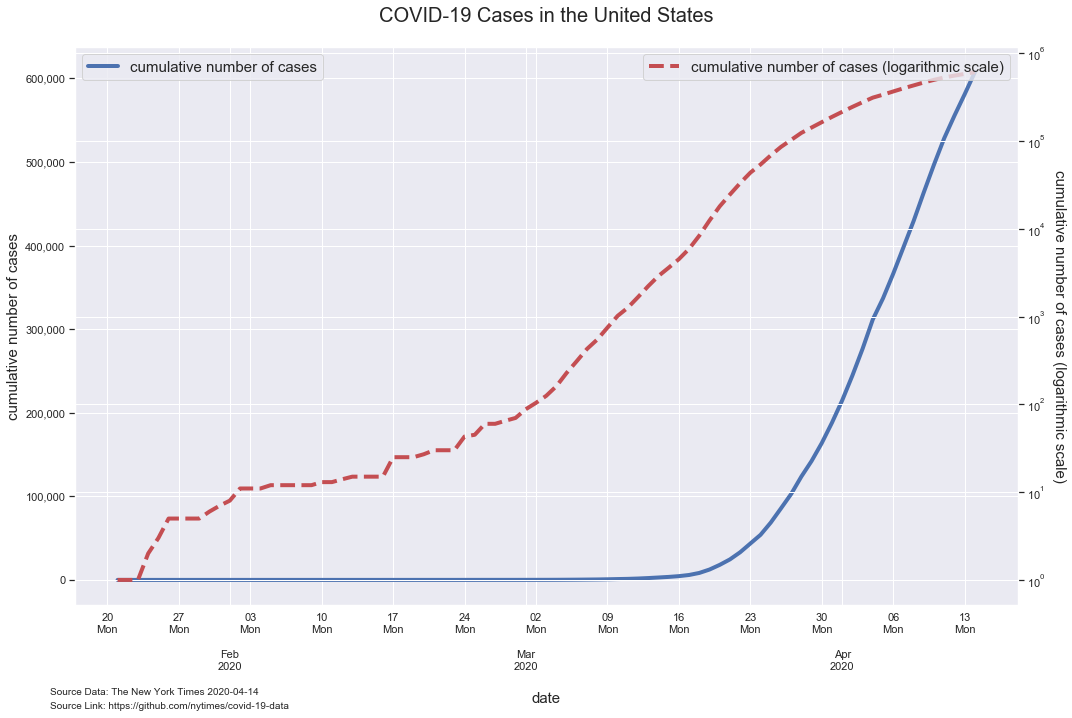

In [107]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)

# Plot 2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')

ax1.grid(True)
ax1.grid(which='minor')
ax2.tick_params(axis='both', which='minor', length=0)
plt.setp(ax2.get_yticklabels(), visible=True)

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)
plt.title('COVID-19 Cases in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-overlay')

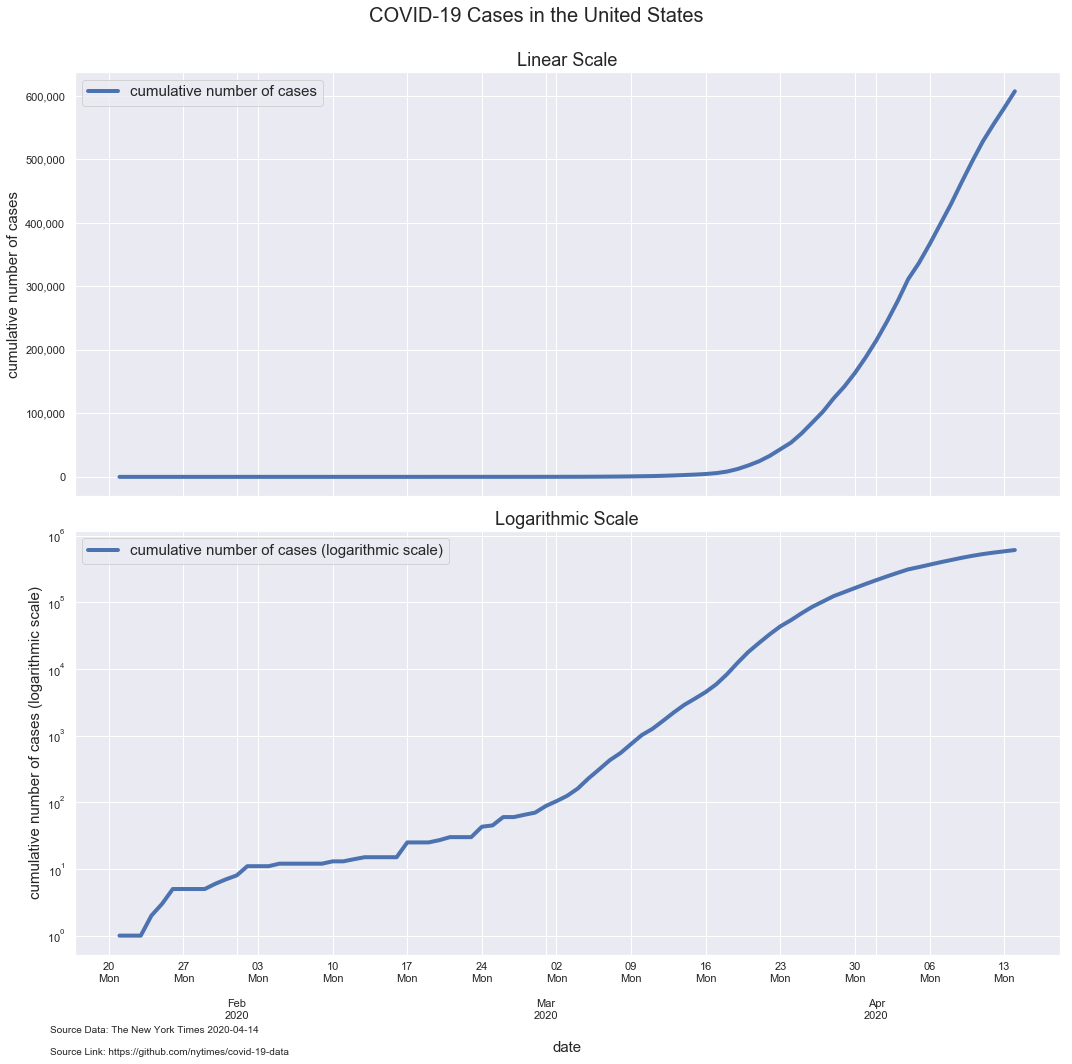

In [108]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(15,15))
fig.suptitle('COVID-19 Cases in the United States', fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')

# Plot 2
ax2.plot(g['cases'], linewidth=4)
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax2.grid(True)
ax2.grid(which='minor', axis='x')

# Formatting Figure
ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=15)
ax1.set_title('Linear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax2.set_yscale('log')

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('figures/nyt-covid-19-data-2-subplots')

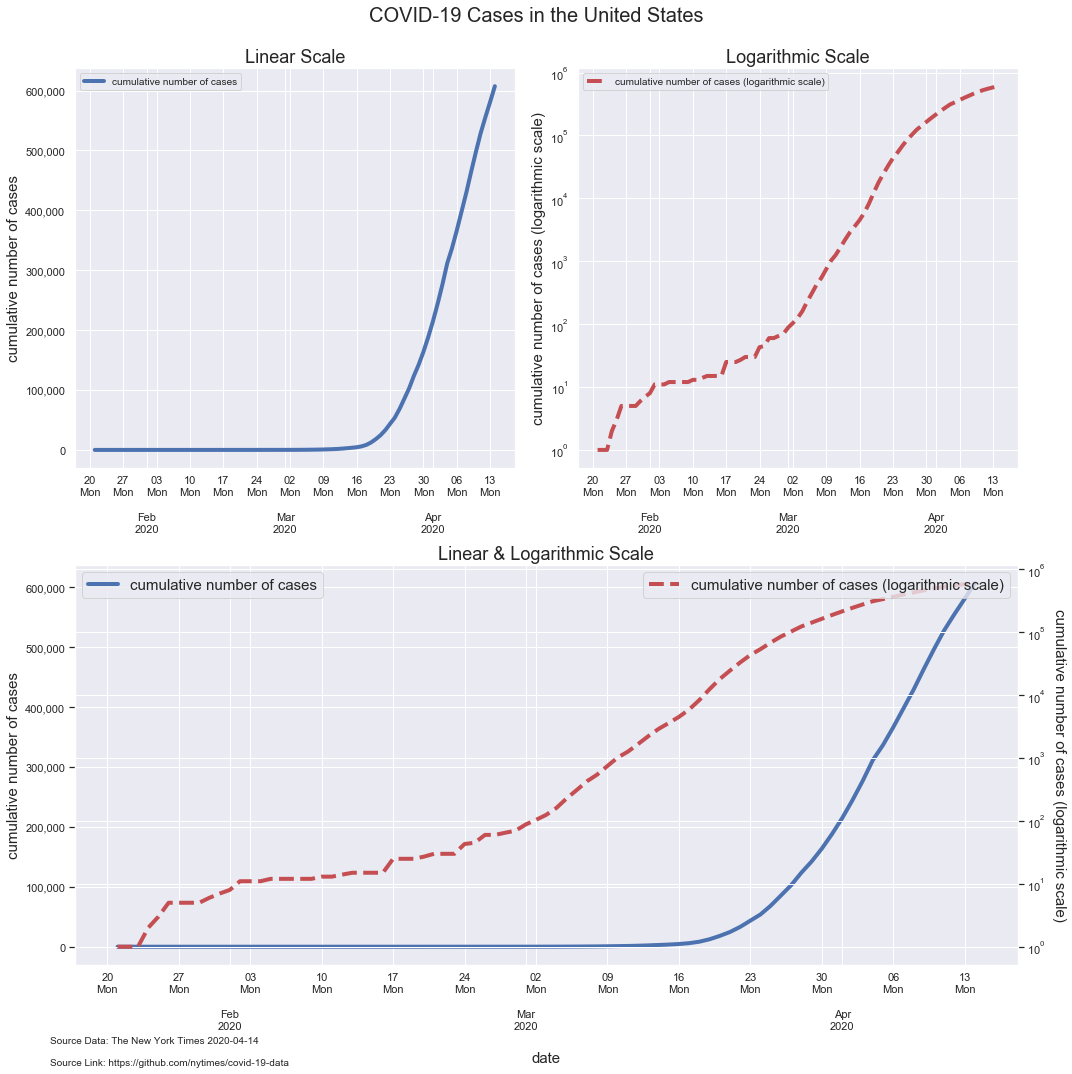

In [109]:
fig, [ax1, ax2, ax3, ax3_1] = plt.subplots(4, 1, sharex=True, figsize=(15,15))
fig.suptitle('COVID-19 Cases in the United States', y = .99, fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax3 = plt.subplot(212)
ax3.plot(g['cases'], linewidth=4)
ax3.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3_1 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3_1.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax3_1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3_1.xaxis.grid(True, which="major")
ax3_1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3_1.set_yscale('log')

ax3.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax3.xaxis.grid(True, which="major")
ax3.xaxis.set_major_locator(dates.MonthLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Plot 2
ax1 = plt.subplot(221)
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))


# Plot 3
ax2 = plt.subplot(222)
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')
ax2.grid(True)
ax2.grid(which='minor', axis='x')
ax3.grid(True)
ax3.grid(which='minor')
ax3_1.grid(True)
ax3_1.grid(which='minor', axis='x')
ax3_1.tick_params(axis='both', which='minor', length=0)

# Setting Labels
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax3.set_ylabel('cumulative number of cases', fontsize=15)
ax3.set_xlabel('date', fontsize=15, labelpad = 20)
ax3_1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')
ax2.get_yaxis().set_visible(True)
ax3_1.get_yaxis().set_visible(True)
ax3_1.set_yscale('log')
ax3_1.get_yaxis().set_visible(True)

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax3.set_title('Linear & Logarithmic Scale', fontsize=18)

# Setting Legends
ax1.legend(['cumulative number of cases'], loc=2, fontsize=10)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=10)
ax3.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax3_1.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-3-subplots')

# Country Trajectory Plot

In [110]:
g['daily_cases'] = g['cases'].diff()

In [111]:
g.head(20)

date  cases  daily_cases
date                                     
2020-01-21 2020-01-21      1          NaN
2020-01-22 2020-01-22      1          0.0
2020-01-23 2020-01-23      1          0.0
2020-01-24 2020-01-24      2          1.0
2020-01-25 2020-01-25      3          1.0
2020-01-26 2020-01-26      5          2.0
2020-01-27 2020-01-27      5          0.0
2020-01-28 2020-01-28      5          0.0
2020-01-29 2020-01-29      5          0.0
2020-01-30 2020-01-30      6          1.0
2020-01-31 2020-01-31      7          1.0
2020-02-01 2020-02-01      8          1.0
2020-02-02 2020-02-02     11          3.0
2020-02-03 2020-02-03     11          0.0
2020-02-04 2020-02-04     11          0.0
2020-02-05 2020-02-05     12          1.0
2020-02-06 2020-02-06     12          0.0
2020-02-07 2020-02-07     12          0.0
2020-02-08 2020-02-08     12          0.0
2020-02-09 2020-02-09     12          0.0

In [112]:
g['daily_cases'].loc[g.daily_cases < 0] = g.cases
g['daily_cases'].loc[g.daily_cases.isnull()] = g.cases

In [113]:
g[:50]

date  cases  daily_cases
date                                     
2020-01-21 2020-01-21      1          1.0
2020-01-22 2020-01-22      1          0.0
2020-01-23 2020-01-23      1          0.0
2020-01-24 2020-01-24      2          1.0
2020-01-25 2020-01-25      3          1.0
2020-01-26 2020-01-26      5          2.0
2020-01-27 2020-01-27      5          0.0
2020-01-28 2020-01-28      5          0.0
2020-01-29 2020-01-29      5          0.0
2020-01-30 2020-01-30      6          1.0
2020-01-31 2020-01-31      7          1.0
2020-02-01 2020-02-01      8          1.0
2020-02-02 2020-02-02     11          3.0
2020-02-03 2020-02-03     11          0.0
2020-02-04 2020-02-04     11          0.0
2020-02-05 2020-02-05     12          1.0
2020-02-06 2020-02-06     12          0.0
2020-02-07 2020-02-07     12          0.0
2020-02-08 2020-02-08     12          0.0
2020-02-09 2020-02-09     12          0.0
2020-02-10 2020-02-10     13          1.0
2020-02-11 2020-02-11     13          0.0
2020-02-12 2020-02-12     14          1.0
2020-02-13 2020-02-13     15          1.0
2020-02-14 2020-02-14     15          0.0
2020-02-15 2020-02-15     15          0.0
2020-02-16 2020-02-16     15          0.0
2020-02-17 2020-02-17     25         10.0
2020-02-18 2020-02-18     25          0.0
2020-02-19 2020-02-19     25          0.0
2020-02-20 2020-02-20     27          2.0
2020-02-21 2020-02-21     30          3.0
2020-02-22 2020-02-22     30          0.0
2020-02-23 2020-02-23     30          0.0
2020-02-24 2020-02-24     43         13.0
2020-02-25 2020-02-25     45          2.0
2020-02-26 2020-02-26     60         15.0
2020-02-27 2020-02-27     60          0.0
2020-02-28 2020-02-28     65          5.0
2020-02-29 2020-02-29     70          5.0
2020-03-01 2020-03-01     88         18.0
2020-03-02 2020-03-02    104         16.0
2020-03-03 2020-03-03    125         21.0
2020-03-04 2020-03-04    161         36.0
2020-03-05 2020-03-05    228         67.0
2020-03-06 2020-03-06    311         83.0
2020-03-07 2020-03-07    428        117.0
2020-03-08 2020-03-08    547        119.0
2020-03-09 2020-03-09    748        201.0
2020-03-10 2020-03-10   1018        270.0

In [114]:
g_weekly = g.set_index('date').resample('W').agg({'cases': np.max, 'daily_cases': np.mean})

In [115]:
g_weekly

cases   daily_cases
date                            
2020-01-26       5      0.833333
2020-02-02      11      0.857143
2020-02-09      12      0.142857
2020-02-16      15      0.428571
2020-02-23      30      2.142857
2020-03-01      88      8.285714
2020-03-08     547     65.571429
2020-03-15    3600    436.142857
2020-03-22   33061   4208.714286
2020-03-29  142194  15590.428571
2020-04-05  336774  27797.142857
2020-04-12  555325  31221.571429
2020-04-19  607318  25996.500000

In [116]:
g_weekly.reset_index(inplace=True)
g_weekly.rename(columns={'cases_diff': 'cases_daily_week_avg'}, inplace=True)

In [117]:
g_weekly

date   cases   daily_cases
0  2020-01-26       5      0.833333
1  2020-02-02      11      0.857143
2  2020-02-09      12      0.142857
3  2020-02-16      15      0.428571
4  2020-02-23      30      2.142857
5  2020-03-01      88      8.285714
6  2020-03-08     547     65.571429
7  2020-03-15    3600    436.142857
8  2020-03-22   33061   4208.714286
9  2020-03-29  142194  15590.428571
10 2020-04-05  336774  27797.142857
11 2020-04-12  555325  31221.571429
12 2020-04-19  607318  25996.500000

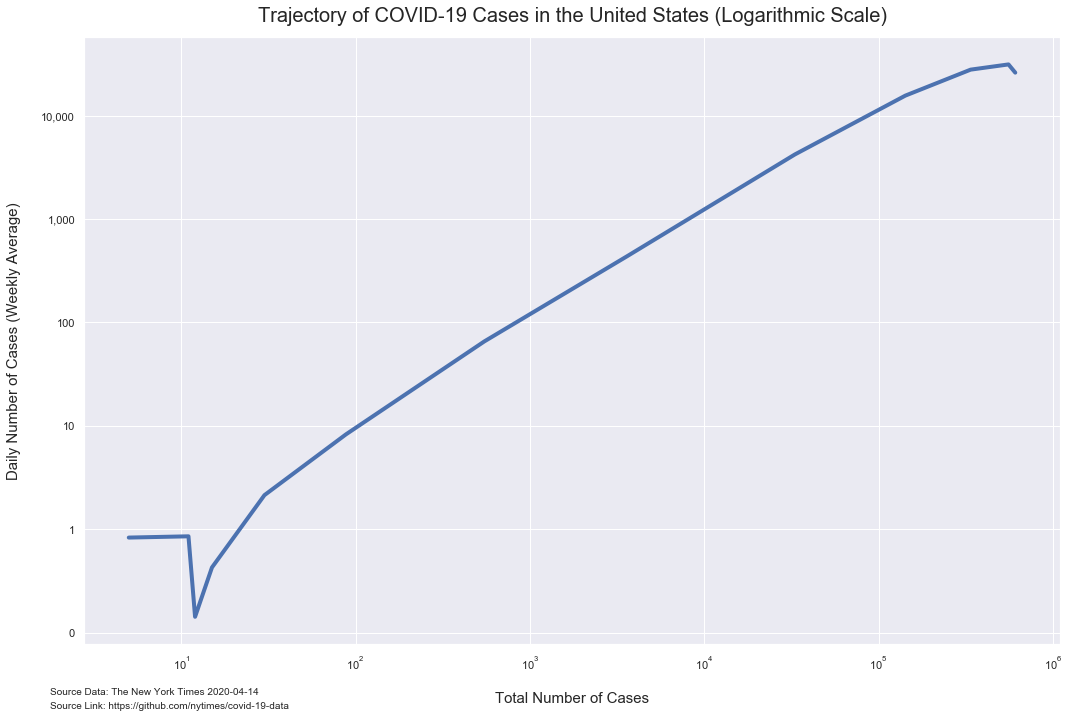

In [118]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="daily_cases", data=g_weekly, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('Total Number of Cases', fontsize=15)
ax1.set_ylabel('Daily Number of Cases (Weekly Average)', fontsize=15)
plt.title('Trajectory of COVID-19 Cases in the United States (Logarithmic Scale)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-usa-trajectory-weekly-plot')

# Bar Chart

In [119]:
covid_19_state_data

date          state  fips  cases  deaths
0    2020-01-21     Washington    53      1       0
1    2020-01-22     Washington    53      1       0
2    2020-01-23     Washington    53      1       0
3    2020-01-24       Illinois    17      1       0
4    2020-01-24     Washington    53      1       0
...         ...            ...   ...    ...     ...
2380 2020-04-14       Virginia    51   6171     154
2381 2020-04-14     Washington    53  10694     552
2382 2020-04-14  West Virginia    54    697      10
2383 2020-04-14      Wisconsin    55   3555     172
2384 2020-04-14        Wyoming    56    282       1

[2385 rows x 5 columns]

In [120]:
# dropping ALL duplicate values 
state_current_cases = covid_19_state_data.sort_values(by = 'date', 
                    ascending=False).drop_duplicates(
                    subset ="state", keep = 'first')

In [121]:
state_current_cases.head()

date          state  fips  cases  deaths
2384 2020-04-14        Wyoming    56    282       1
2356 2020-04-14       Missouri    29   4686     152
2354 2020-04-14      Minnesota    27   1695      79
2353 2020-04-14       Michigan    26  26844    1766
2352 2020-04-14  Massachusetts    25  28163     957

In [122]:
state_current_cases.state.value_counts()

Alaska                      1
Rhode Island                1
Vermont                     1
North Carolina              1
Massachusetts               1
Michigan                    1
Idaho                       1
Washington                  1
Indiana                     1
Nevada                      1
South Carolina              1
Iowa                        1
Oklahoma                    1
Northern Mariana Islands    1
District of Columbia        1
Ohio                        1
Connecticut                 1
Kentucky                    1
Wyoming                     1
Pennsylvania                1
Arizona                     1
Guam                        1
Mississippi                 1
Tennessee                   1
Montana                     1
Delaware                    1
New Hampshire               1
Colorado                    1
Texas                       1
West Virginia               1
Florida                     1
Wisconsin                   1
South Dakota                1
Maine     

In [123]:
state_current_cases.loc[state_current_cases.state == 'New York']

date     state  fips   cases  deaths
2363 2020-04-14  New York    36  202208   10834

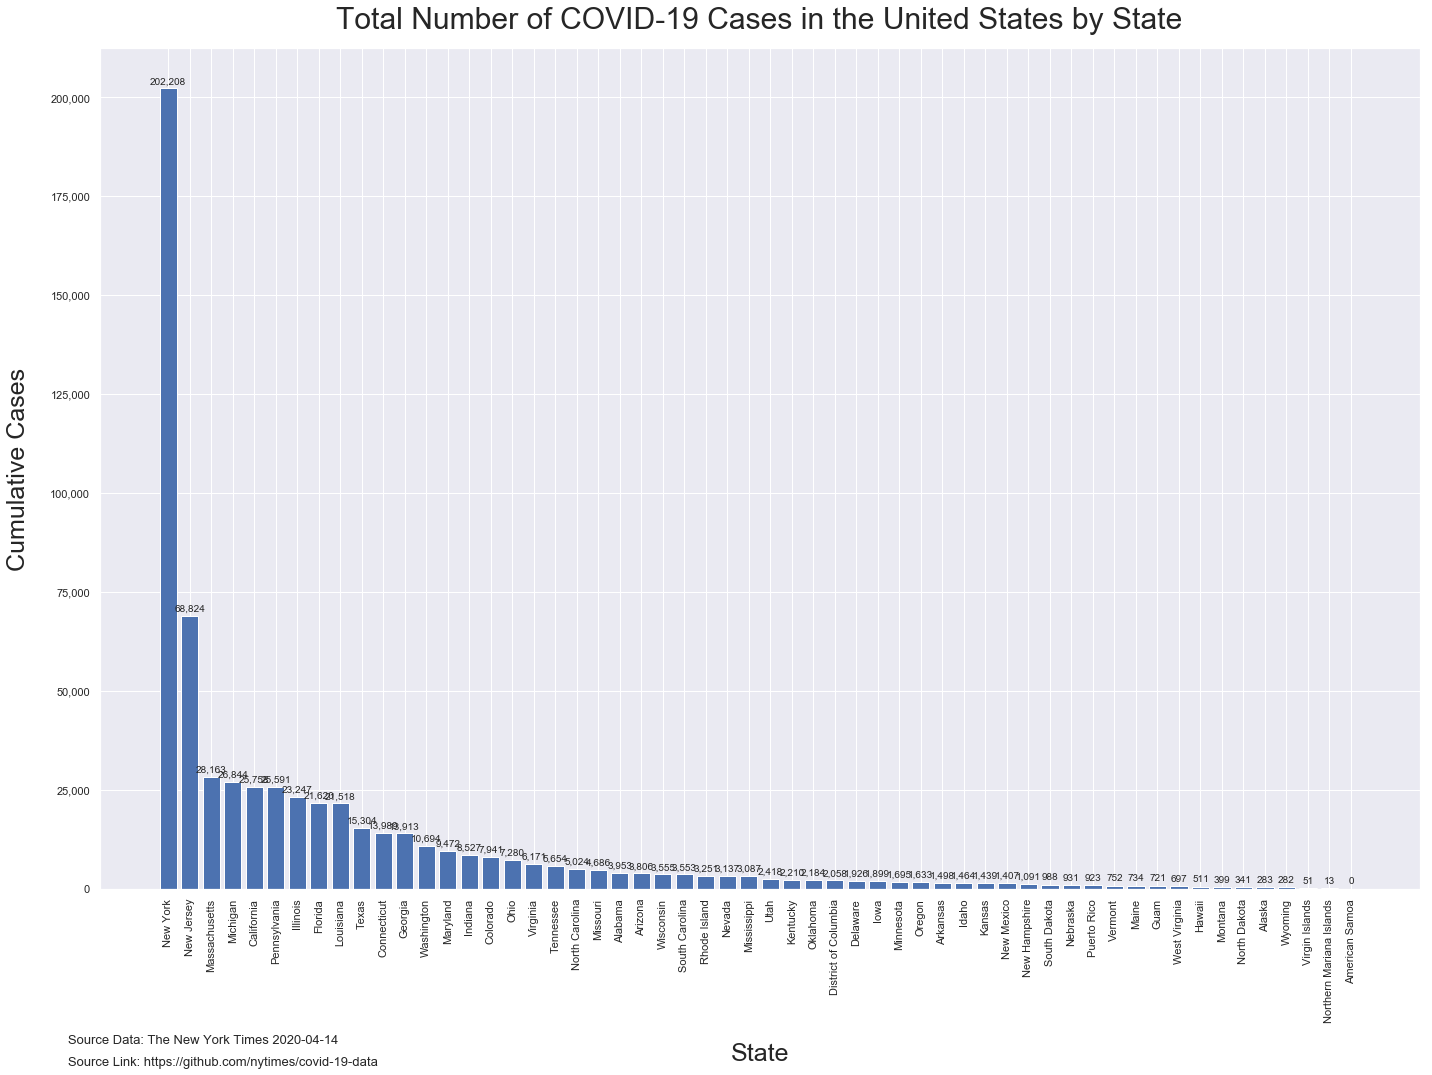

In [124]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=False)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label = ax.bar(bar.index, bar.cases)
plt.xlabel("State", labelpad=14, fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Cumulative Cases", labelpad=14, fontsize=25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(label)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Total Number of COVID-19 Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-bar')

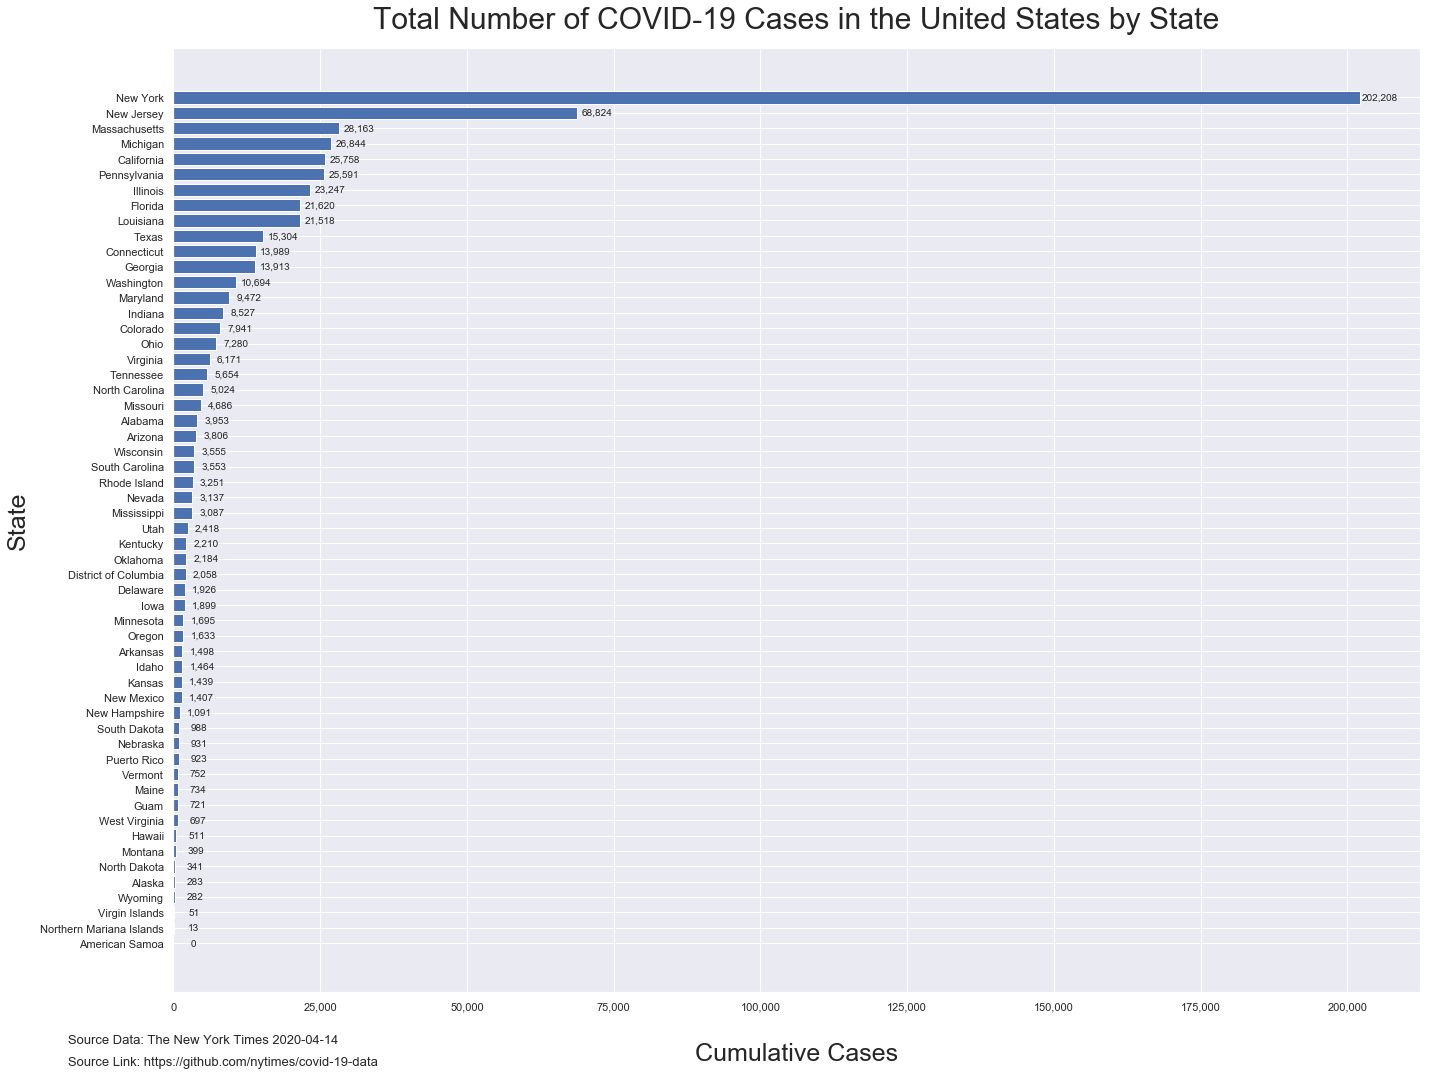

In [125]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=True)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar.index, bar.cases)
plt.xlabel("Cumulative Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("State", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Total Number of COVID-19 Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-barh')

# I have downloaded the shapefile already

In [126]:
#url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'

# data_path = 'data'
# fullfilename = os.path.join(data_path, 'state_shape.gz')
# urllib.request.urlretrieve(url, fullfilename)

In [127]:
#file_path = 'data/state_shape.gz'

# items = zipfile.ZipFile(file_path)

# available files in the container
# print(items.namelist())

In [128]:
# opening Zip using 'with' keyword in read mode
# with zipfile.ZipFile(file_path, 'r') as file:
#     file.extractall(data_path)

In [129]:
states_shape = gpd.GeoDataFrame.from_file('data/cb_2018_us_state_500k.shp')

In [130]:
states_shape.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  (POLYGON ((-88.502966 30.215235, -88.491759 30...  
1  (POLYGON ((-75.72680699999999 35.935844, -75.7...  
2  POLYGON ((-103.002565 36.526588, -103.002188 3...  
3  (POLYGON ((-75.742406 37.80835, -75.741512 37....  
4  POLYGON ((-82.6431981036679 38.1690897960737, ...

In [131]:
states_shape.sort_values(by='NAME')

STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
17      01  01779775  0400000US01    01     AL   
27      02  01785533  0400000US02    02     AK   
37      60  01802701  0400000US60    60     AS   
35      04  01779777  0400000US04    04     AZ   
52      05  00068085  0400000US05    05     AR   
16      06  01779778  0400000US06    06     CA   
21      08  01779779  0400000US08    08     CO   
45      69  01779809  0400000US69    69     MP   
55      09  01779780  0400000US09    09     CT   
43      10  01779781  0400000US10    10     DE   
36      11  01702382  0400000US11    11     DC   
9       12  00294478  0400000US12    12     FL   
18      13  01705317  0400000US13    13     GA   
44      66  01802705  0400000US66    66     GU   
42      15  01779782  0400000US15    15     HI   
8       16  01779783  0400000US16    16     ID   
29      17  01779784  0400000US17    17     IL   
53      18  00448508  0400000US18    18     IN   
32      19  01779785  0400000US19    19     IA   
26      20  00481813  0400000US20    20     KS   
47      21  01779786  0400000US21    21     KY   
5       22  01629543  0400000US22    22     LA   
41      23  01779787  0400000US23    23     ME   
40      24  01714934  0400000US24    24     MD   
7       25  00606926  0400000US25    25     MA   
6       26  01779789  0400000US26    26     MI   
54      27  00662849  0400000US27    27     MN   
0       28  01779790  0400000US28    28     MS   
20      29  01779791  0400000US29    29     MO   
31      30  00767982  0400000US30    30     MT   
10      31  01779792  0400000US31    31     NE   
28      32  01779793  0400000US32    32     NV   
34      33  01779794  0400000US33    33     NH   
39      34  01779795  0400000US34    34     NJ   
12      35  00897535  0400000US35    35     NM   
25      36  01779796  0400000US36    36     NY   
1       37  01027616  0400000US37    37     NC   
51      38  01779797  0400000US38    38     ND   
48      39  01085497  0400000US39    39     OH   
2       40  01102857  0400000US40    40     OK   
50      41  01155107  0400000US41    41     OR   
19      42  01779798  0400000US42    42     PA   
13      72  01779808  0400000US72    72     PR   
46      44  01219835  0400000US44    44     RI   
33      45  01779799  0400000US45    45     SC   
14      46  01785534  0400000US46    46     SD   
23      47  01325873  0400000US47    47     TN   
15      48  01779801  0400000US48    48     TX   
38      78  01802710  0400000US78    78     VI   
22      49  01455989  0400000US49    49     UT   
30      50  01779802  0400000US50    50     VT   
3       51  01779803  0400000US51    51     VA   
11      53  01779804  0400000US53    53     WA   
4       54  01779805  0400000US54    54     WV   
49      55  01779806  0400000US55    55     WI   
24      56  01779807  0400000US56    56     WY   

                                            NAME LSAD          ALAND  \
17                                       Alabama   00   131174048583   
27                                        Alaska   00  1478839695958   
37                                American Samoa   00      197759063   
35                                       Arizona   00   294198551143   
52                                      Arkansas   00   134768872727   
16                                    California   00   403503931312   
21                                      Colorado   00   268422891711   
45  Commonwealth of the Northern Mariana Islands   00      472292529   
55                                   Connecticut   00    12542497068   
43                                      Delaware   00     5045925646   
36                          District of Columbia   00      158340391   
9                                        Florida   00   138949136250   
18                                       Georgia   00   149482048342   
44                                          Guam   00      543555840   
42                                        Hawaii   00    16633990195   


In [132]:
bar_drop_index = bar.reset_index(drop=True)

states_shape_cases = states_shape.merge(bar_drop_index, left_on='NAME', right_on='state')

In [133]:
states_shape_cases.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry       date  \
0  (POLYGON ((-88.502966 30.215235, -88.491759 30... 2020-04-14   
1  (POLYGON ((-75.72680699999999 35.935844, -75.7... 2020-04-14   
2  POLYGON ((-103.002565 36.526588, -103.002188 3... 2020-04-14   
3  (POLYGON ((-75.742406 37.80835, -75.741512 37.... 2020-04-14   
4  POLYGON ((-82.6431981036679 38.1690897960737, ... 2020-04-14   

            state  fips  cases  deaths  
0     Mississippi    28   3087     111  
1  North Carolina    37   5024     116  
2        Oklahoma    40   2184     109  
3        Virginia    51   6171     154  
4   West Virginia    54    697      10

In [134]:
states_shape_cases.STUSPS.unique()

array(['MS', 'NC', 'OK', 'VA', 'WV', 'LA', 'MI', 'MA', 'ID', 'FL', 'NE',
       'WA', 'NM', 'PR', 'SD', 'TX', 'CA', 'AL', 'GA', 'PA', 'MO', 'CO',
       'UT', 'TN', 'WY', 'NY', 'KS', 'AK', 'NV', 'IL', 'VT', 'MT', 'IA',
       'SC', 'NH', 'AZ', 'DC', 'AS', 'NJ', 'MD', 'ME', 'HI', 'DE', 'GU',
       'RI', 'KY', 'OH', 'WI', 'OR', 'ND', 'AR', 'IN', 'MN', 'CT'],
      dtype=object)

(-2259318.989842429,
 2743787.7776512564,
 -2259441.9737315555,
 874818.5571526419)

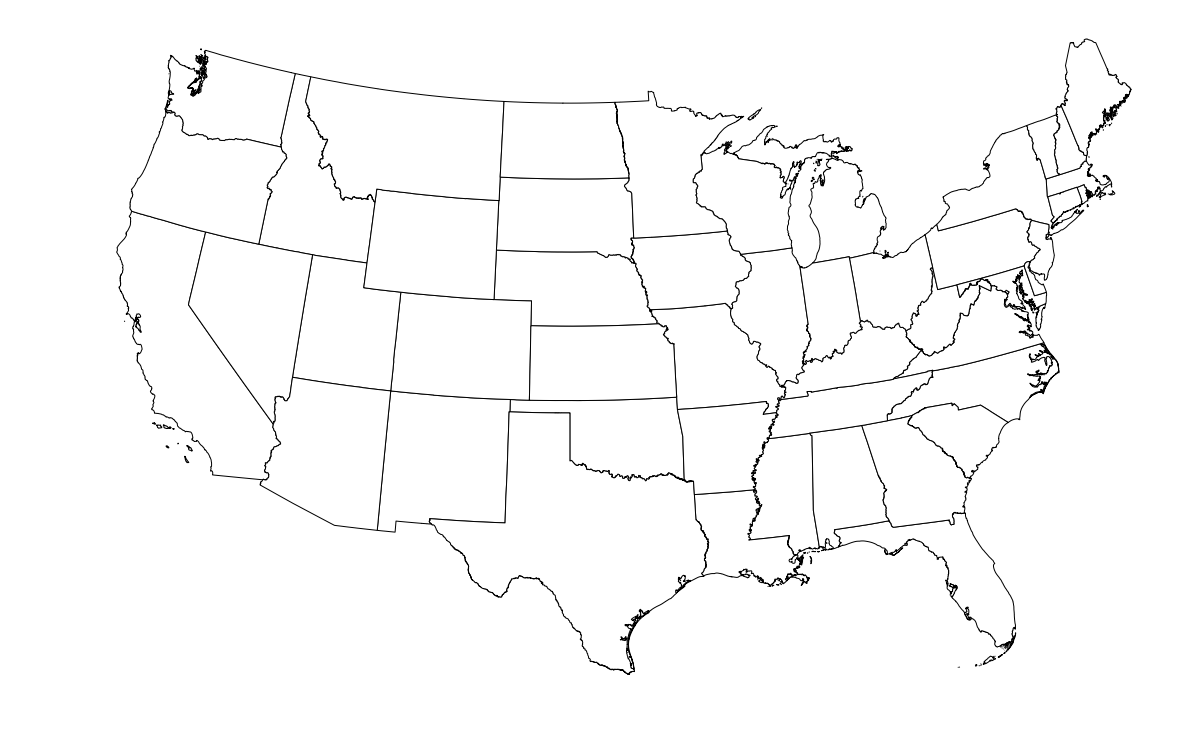

In [135]:
fig, ax = plt.subplots(figsize=(20,15))

delete_states = ['AK', 'AS', 'HI', 'PR', 'GU']
states_shape_cases  = states_shape_cases.loc[~states_shape_cases['STUSPS'].isin(delete_states)]
states_shape_cases = states_shape_cases.to_crs(epsg=2163)

states_shape_cases.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [136]:
states_shape_cases['point'] = states_shape_cases['geometry'].centroid
state_points = states_shape_cases[['point', 'NAME', 'cases']]
state_points = state_points.set_geometry('point')
state_points['coords'] = state_points['point'].apply(lambda x: x.representative_point().coords[:])
state_points['coords'] = [state_points[0] for state_points in state_points['coords']]

In [137]:
state_points.head()

point            NAME  cases  \
0  POINT (968900.5142401541 -1302349.006773153)     Mississippi   3087   
1  POINT (1849270.427707764 -820703.8884651705)  North Carolina   5024   
2  POINT (227351.7828779383 -1041651.468761091)        Oklahoma   2184   
3  POINT (1846721.444074068 -594717.0352157739)        Virginia   6171   
4  POINT (1666480.709214782 -511066.3749840383)   West Virginia    697   

                                     coords  
0  (968900.5142401541, -1302349.0067731533)  
1  (1849270.4277077643, -820703.8884651705)  
2  (227351.7828779383, -1041651.4687610908)  
3  (1846721.4440740685, -594717.0352157739)  
4   (1666480.709214782, -511066.3749840383)

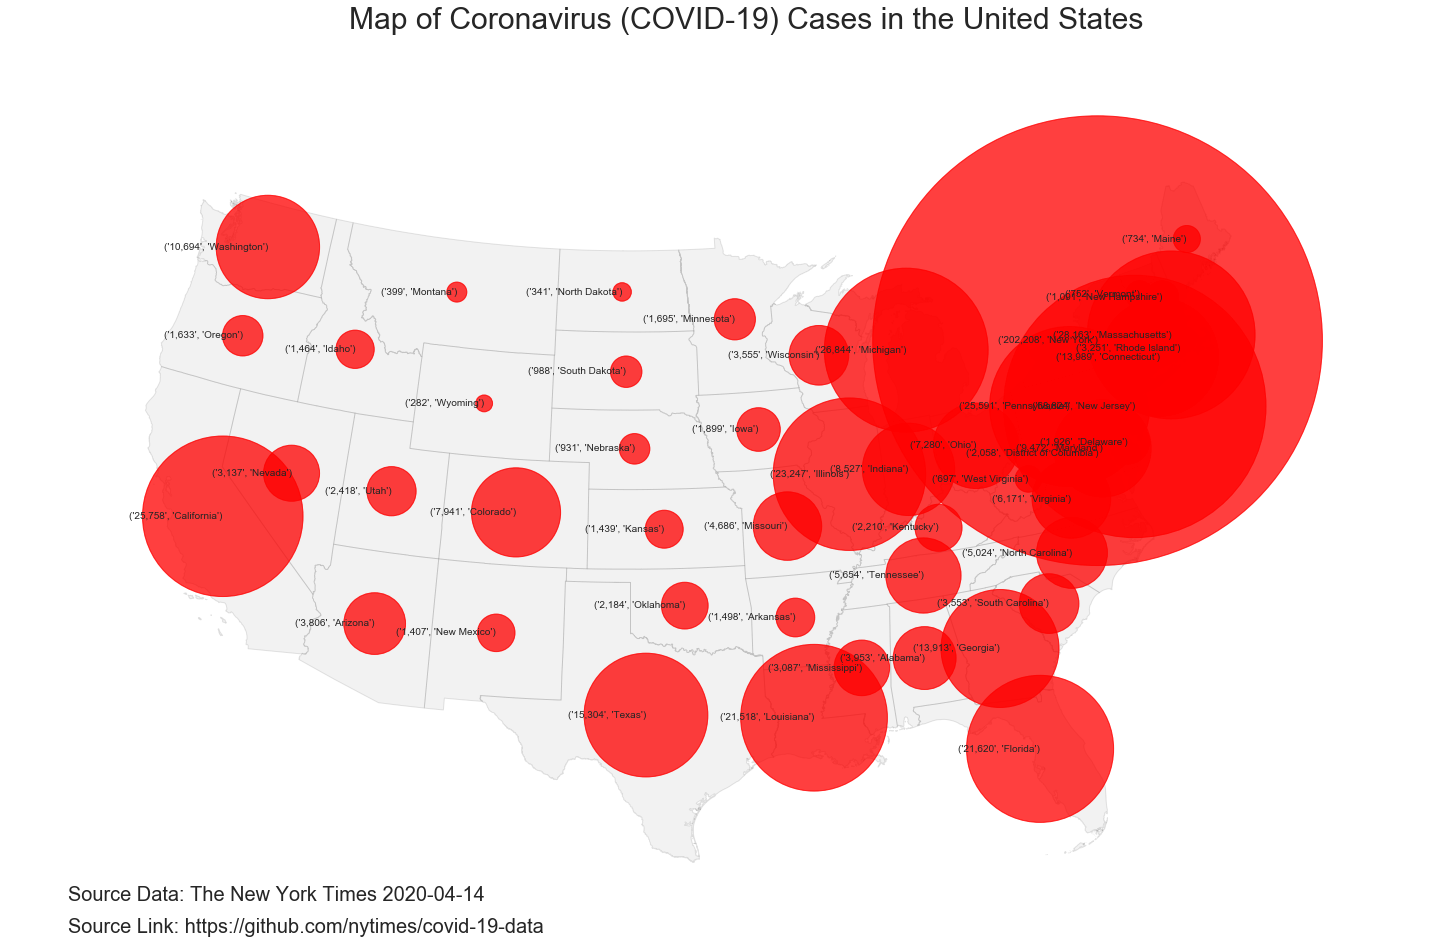

In [138]:
fig, ax = plt.subplots(figsize=(20,15))

states_shape_cases.plot(ax=ax, color='gray', edgecolor='black', alpha=.1)
state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)

state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)
for idx, row in state_points.iterrows():
    plt.annotate(s=('{:,}'.format(row['cases']), row['NAME']), xy=row['coords'],
                 horizontalalignment='right', va='center')
    
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.1, txt, wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.05, 0.07, txt2, wrap=True, horizontalalignment='left', fontsize=20)

ax.set_title('Map of Coronavirus (COVID-19) Cases in the United States', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map')

In [139]:
# # defining our plot
# plt.subplots(figsize=(20,15))
# ax = plt.subplot()

# fig = states_shape_cases.plot(column=("cases"), ax=ax, k=7, 
#                    scheme='fisher_jenks', label=True, legend=True, 
#                    legend_kwds={'loc': 'lower left', 'title': 'Number of COVID-19 Cases', 
#                    'title_fontsize': 'x-large','fontsize': 'x-large'}, 
#                    cmap='viridis', edgecolor='black')

# ax.set_title("Map of Number of Coronavirus (COVID-19) Cases in the United State by State", fontsize=30)
# txt = ('Source Data: The New York Times ' + current_date)
# txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
# txt3 = ('Choropleth Sheme: fisher_jenks')
# plt.figtext(0.2, 0.145, txt, wrap=True, horizontalalignment='left', fontsize=15)
# plt.figtext(0.2, 0.115, txt2, wrap=True, horizontalalignment='left', fontsize=15)
# plt.figtext(0.2, 0.175, txt3, wrap=True, horizontalalignment='left', fontsize=15)

# leg = fig.get_legend()
# leg._loc = 3

# for lbl in leg.get_texts():
#     label_text = lbl.get_text()
#     lower = label_text.split()[0]
#     upper = label_text.split()[2]
#     new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
#     lbl.set_text(new_text)

# plt.axis('off')
# plt.tight_layout()
# plt.savefig('figures/nyt-covid-19-data-state-map-choro')

In [140]:
covid_19_state_data.to_csv('data/us-states-raw-data.csv', index=False)
g.to_csv('data/us-states-grouped-day.csv')
bar.to_csv('data/us-states-grouped-states.csv')